<h1> Gender Wage Gap in Sports Project</h1> 

By Tiffany Chen and Un Leong

Did you know that LeBron James makes over \$30 million this year playing in the NBA? Did you know that Candance Parker, the female counterpart of James in the WNBA, makes only \$220,000 this year playing in the WNBA? 

According to the United States Census Bureau, http://www.financialsamurai.com/median-income-by-age-and-sex-in-america/,  at every age bracket, mens' median salary is higher than womens' median salary. This is a troubling picture when, in our soceity, we care about equality and that everyone gets the same treatment regardless of gender, sexuality, religion, race, ethnicity, and so on. We won't be able to reach true equality when, on average, men make more than women for the same amount of work.

In this project, we are going to explore the gender wage gap issue in basketball, specially the National Basketball Association (NBA) and the Women Natinoal Basketball Association (WNBA) located in the United States of America. We want to explore the severity of the gender wage gap using and compare it to other sports, such as tennis to see whether the severity is the same across over sports. The WNBA is the sister league to the NBA, but is has not found the same success as the NBA. Many players in the WNBA do not make enough money to support themselves and have to play overseas during the WNBA off-season to make more money. They also tend to make a lot more money in oversea leagues than in the WNBA, which is the exact oppostie for the NBA. During the 2015 WNBA season, WNBA all-star Diana Taurasi sat out the entire WNBA season because her Russia team paid her \$1 million to sit out for rest. 

<h3> Data </h3>

We got our data from a variety of different websites. The websites we used were basketballreference.com, wnba.com, nba.com, forbes.com, espn.com, networthtomb.com, wikipedia.com, shesaballer.com, moneynation.com, playerswiki.com, spotrac.com, and totalsportek.com. From these websites, we got data on NBA and WNBA players' salaries for the 2017 and 2018 seasons. For the purpose of thie project, we treat the NBA season of 2016-2017 and 2017-2018 as just 2017 season and 2018 season, respectively. This makes it easier for us to compare it against the WNBA players' season. We also got individual characteristics of the players that will be explained in more details later. In addition, we got NBA and WNBA league data such as salary scale, team valuation, team attendance, team revenue, team operating income, and debt-to-value numbers for the teams. Lastly, we got data on the salary for the top 20 professional men and women tennis players in the world. 

In [1]:
# import the functions I need 
import pandas as pd
import numpy as np 
import os
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

In [2]:
# look at the excel files in the project folder 
data_path = '/Users/unleong/Desktop/STA141B/Project'
files = os.listdir(data_path)
print files

['.DS_Store', 'match_nba_wnba.xlsx', 'men_tennis_salary.xlsx', 'NBA_15-16_attendance.xlsx', 'NBA__team_valuations.xlsx', 'nba_all.xlsx', 'NBA_revenue.xlsx', 'NBA_salaries.xlsx', 'NBA_salary_cap.xlsx', 'NBA_team_salary.xlsx', 'nba_wnba_salary.xlsx', 'Project Presentation.pptx', 'Salary_scale.xlsx', 'wnba_all.xlsx', 'WNBA_salaries.xlsx', 'WNBA_salary_cap.xlsx', 'women_tennis_salary.xlsx']


<h3> Approach </h3>

We plan to look at some of the raw numbers and statistics between the NBA and WNBA. We want to get a picture of what is different between the two leagues to begin with. Next, we will perform statistics test to determine whether there is a statistically different salary between NBA and WNBA players. If there is one, we want to calculate how unequal it is between the two leagues. Additionally, we will explore whether other sports have a gender wage gap difference, and if it does, how unequal it is. 

<h3> NBA and WNBA Differences </h3>

We first explored some of the differences between the NBA and WNBA, such as salary scale, attendance, valuation, operating income, revenue, and debt-to-value ratios. 

Some logistical differences between the NBA and WNBA:

NBA                                      | WNBA               
---------------------------------------- | ----------------------------------------
Founded on June 6, 1946                  | Founded on April 24, 1996     
Consist of 30 teams                      | Consist of 12 teams  
Have 82 regular season games             | Have 34 regular season games 
Maximum of 15 players on each team       | Maximum of 12 players on each team           
Every game has 4 quarters                | Every game has 4 quarters
Each quarter has 12 minutes              | Each quarter has 10 minutes
Season starts in October and ends in June| Season starts in May and ends in September             

Both the NBA and WNBA have minimum salary scales that pay a player a certain salary based on the number of years they played in the league. The union and their respective league bargain for the amount and it is stated in their Collective Bargain Agreement (CBA). 


In [4]:
# get the salary scale file
salary_scale = pd.read_excel(os.path.join(data_path, files[12]))
salary_scale.head()

,Year,Experience,WNBA,NBA
0,2008,0,34500,442114
1,2008,1,34500,711517
2,2008,2,34500,797581
3,2008,3,50000,826269
4,2008,4,50000,854957


In [5]:
# split the data into the different columns
year = salary_scale.iloc[:,0]
experience = salary_scale.iloc[:,1]
wnba = salary_scale.iloc[:,2]
nba = salary_scale.iloc[:,3]

[(30000, 1000000)]

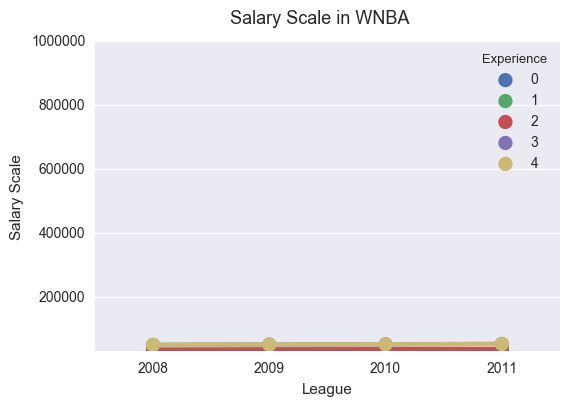

In [6]:
# graph the salary scales for the WNBA 
ax = sns.pointplot(x = year, y = wnba, hue = experience)
ax.set(xlabel = 'League', ylabel = 'Salary Scale')
title_string = "Salary Scale in WNBA"
plt.suptitle(title_string, fontsize = 13)
# set the scales to be the same for comparsion 
ax.set(ylim = (30000, 1000000))

WNBA players do not see a pay raise from 0 to 2 years of experience or from 3 to 4 years of experience. 

[(30000, 1000000.0)]

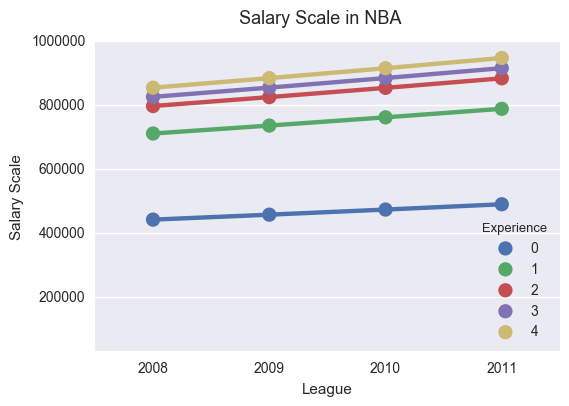

In [7]:
# graph the salary scales for the NBA 
ax = sns.pointplot(x = year, y = nba, hue = experience)
ax.set(xlabel = 'League', ylabel = 'Salary Scale')
title_string = "Salary Scale in NBA"
plt.suptitle(title_string, fontsize = 13)
# set the same to be the same for comparsion
ax.set(ylim = (30000, None))

NBA players see a pay raise every year they stay in the league. The pay raise is the highest from 0 to 1 year of experience. 

Compared to the WNBA, NBA players start out making more and every year they are in the league, they continuously make more money than their female counterparts. 

In [8]:
# get the attendance for the 2016 NBA season to compare it with the WNBA
attendance_2016 = pd.read_excel(os.path.join(data_path, files[3]))
# take the top 3 and lowest 3 attendances 
top_3 = attendance_2016.iloc[0:3,:]
low_3 = attendance_2016.iloc[27:30,:]
frames = [top_3, low_3]
top_low_3 = pd.concat(frames)
top_low_3


,Rank (by average),Team,Games,Total,Average,Percentage
0,1,Bulls,41.0,894659.0,21820.0,104.3
1,2,Cavaliers,41.0,843042.0,20562.0,100.0
2,3,Mavericks,41.0,825901.0,20143.0,104.9
27,28,76ers,41.0,610121.0,14881.0,73.2
28,29,Timberwolves,41.0,581178.0,14175.0,73.2
29,30,Nuggets,41.0,577898.0,14095.0,73.6


In [9]:
# get the columns I need to graph later 
team = top_low_3.iloc[:,1]
total = top_low_3.iloc[:,3]
average = top_low_3.iloc[:,4]

[(6000, 25000)]

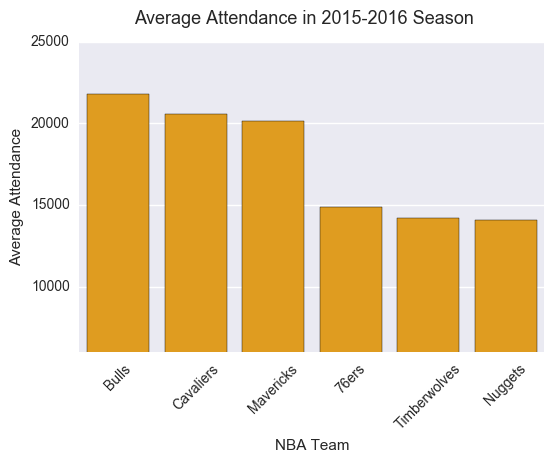

In [10]:
# graph the teams and the average attendance 
ax = sns.barplot(x = team, y = average, color = "orange")
ax.set(xlabel = 'NBA Team', ylabel = 'Average Attendance')
plt.xticks(rotation = 45)
title_string = "Average Attendance in 2015-2016 Season"
plt.suptitle(title_string, fontsize = 13)
# set the scale to be the same for comparsion 
ax.set(ylim = (6000, 25000)) 

The graph above shows the top three teams with the highest average attendance on the left and the bottom three teams with the lowest average attendance on the right for the 2015-2016 NBA season. 

In [11]:
# attendance for the WNBA in 2016 (very limited data)
# average attendance for top three teams
wnba_attendance = {"Team": pd.Series(["Sky", "Fever", "Mercury"],
                                   index = ["0", "1", "2"]),
               "Average": pd.Series([7099, 8575, 10351],
                                  index = ["0", "1", "2"])}
wnba_attendance = pd.DataFrame(wnba_attendance)
wnba_attendance


,Average,Team
0,7099,Sky
1,8575,Fever
2,10351,Mercury


In [12]:
# get the columns to a variable to graph later 
wnba_team = wnba_attendance.iloc[:,1]
wnba_average = wnba_attendance.iloc[:,0]

[(6000, 25000)]

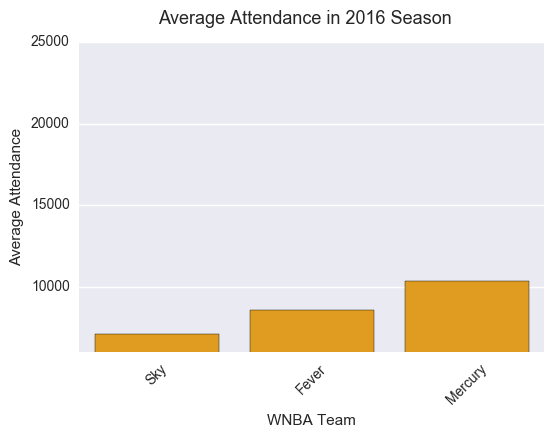

In [13]:
# graph the teams and the average attendance 
ax = sns.barplot(x = wnba_team, y = wnba_average, color = "orange")
ax.set(xlabel = 'WNBA Team', ylabel = 'Average Attendance')
plt.xticks(rotation = 45)
title_string = "Average Attendance in 2016 Season"
plt.suptitle(title_string, fontsize = 13)
# set the scale to be the same for comparsion 
ax.set(ylim = (6000, 25000)) 

The three highest average league attendance in the WNBA is not even close to the the bottom three teams in the NBA in terms of attendance. The Phoneix Mercury, the highest league attendance, averages about half of the attendance then the 76ers, the team with the lowest average league attendance in the NBA. 

In [14]:
# get the team valuation file
# the revenue is last updated on Feb 15,2017
NBA_value = pd.read_excel(os.path.join(data_path, files[4]))
NBA_value.head()

,Rank,Team,Current Value ($million),1-Year Value Change,Debt/Value,Revenue,Operating Income
0,1,New York Knicks,3300.0,0.1,0.0,376.0,141.2
1,2,Los Angeles Lakers,3000.0,11.0,1.0,333.0,119.2
2,3,Golden State Warriors,2600.0,37.0,10.0,305.0,74.2
3,4,Chicago Bulls,2500.0,9.0,2.0,232.0,45.5
4,5,Boston Celtics,2200.0,5.0,7.0,200.0,60.1


There wasn't a value for the operating income for the Memphis Grizzlies, so I just put in a zero so I can plot it later. However, we are going to ignore that point.  

In [15]:
# get just the teams
NBA_value_teams = NBA_value.iloc[0:30,:]

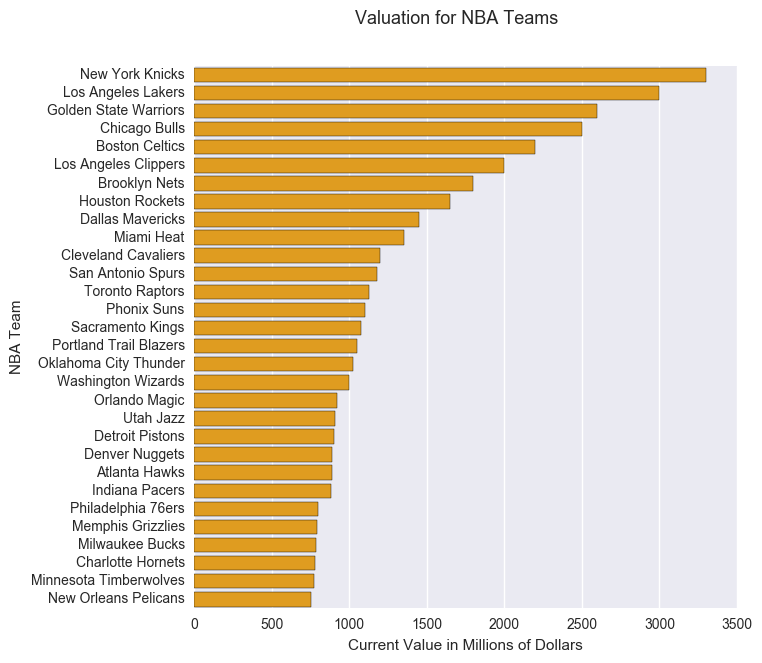

In [25]:
# graph team name and their current value
ax = sns.barplot(x = 'Current Value ($million)', y = 'Team',
          data = NBA_value_teams, color = "orange")
ax.set(xlabel = 'Current Value in Millions of Dollars', ylabel = 'NBA Team')
plt.rcParams['figure.figsize'] = (7,7)
title_string = "Valuation for NBA Teams"
plt.suptitle(title_string, fontsize = 13)
# maybe add the league average also and make it a different color?

The New York Knicks has the highest valuation for out of all the NBA teams at over \$3.5 billion by Forbes. The top three valuation teams big in big markets which means they have more money to spend on players. THe teams that are valued at the bottom, such as the New Orleans Pelicans and Minnesota Timberwolves, are located in a smaller market and typcially have fewer money to spend on its players.

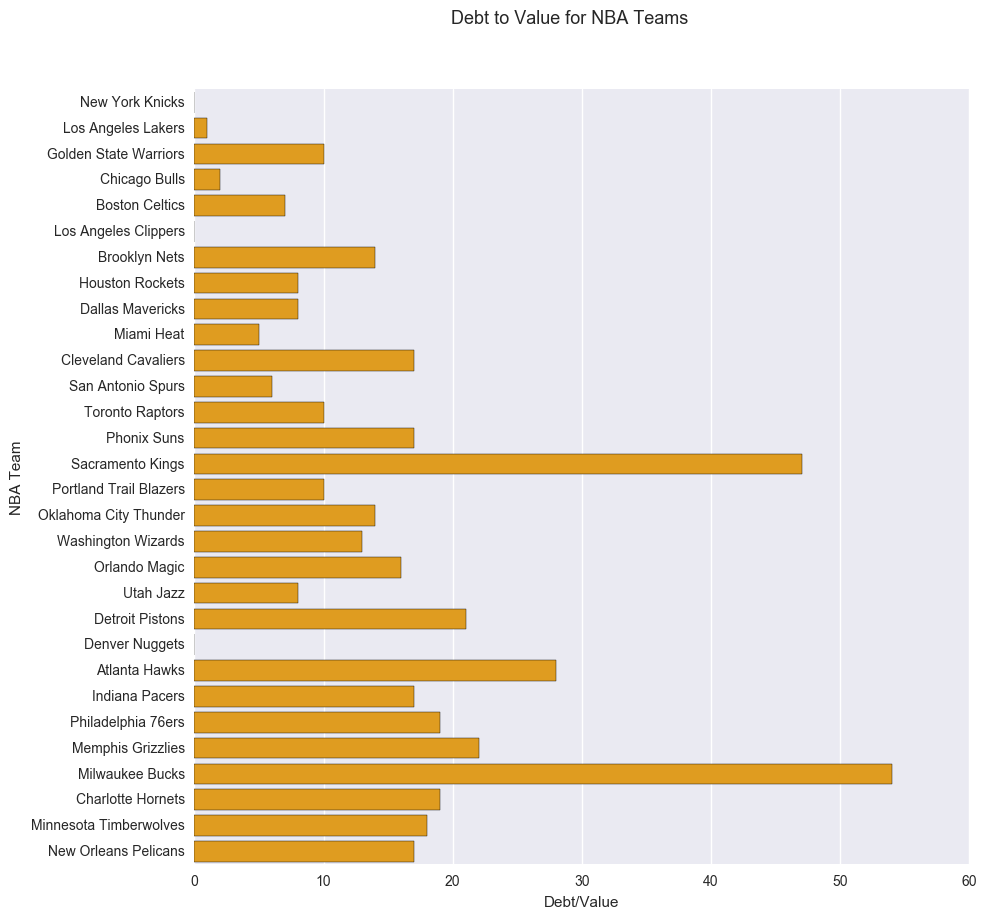

In [23]:
# graph debt/ratio for each team
ax = sns.barplot(x = 'Debt/Value', y = 'Team',
          data = NBA_value_teams, color = "orange")
ax.set(xlabel = 'Debt/Value', ylabel = 'NBA Team')
plt.rcParams['figure.figsize'] = (7,7)
title_string = "Debt to Value for NBA Teams"
plt.suptitle(title_string, fontsize = 13)

Most teams, excluding the New York Knicks, Los Angeles Clippers, and the Denver Nuggets, all are have a positive debt to value ratio. This means that most NBA teams spend more, espcially on players to win games, than they actualy earn.

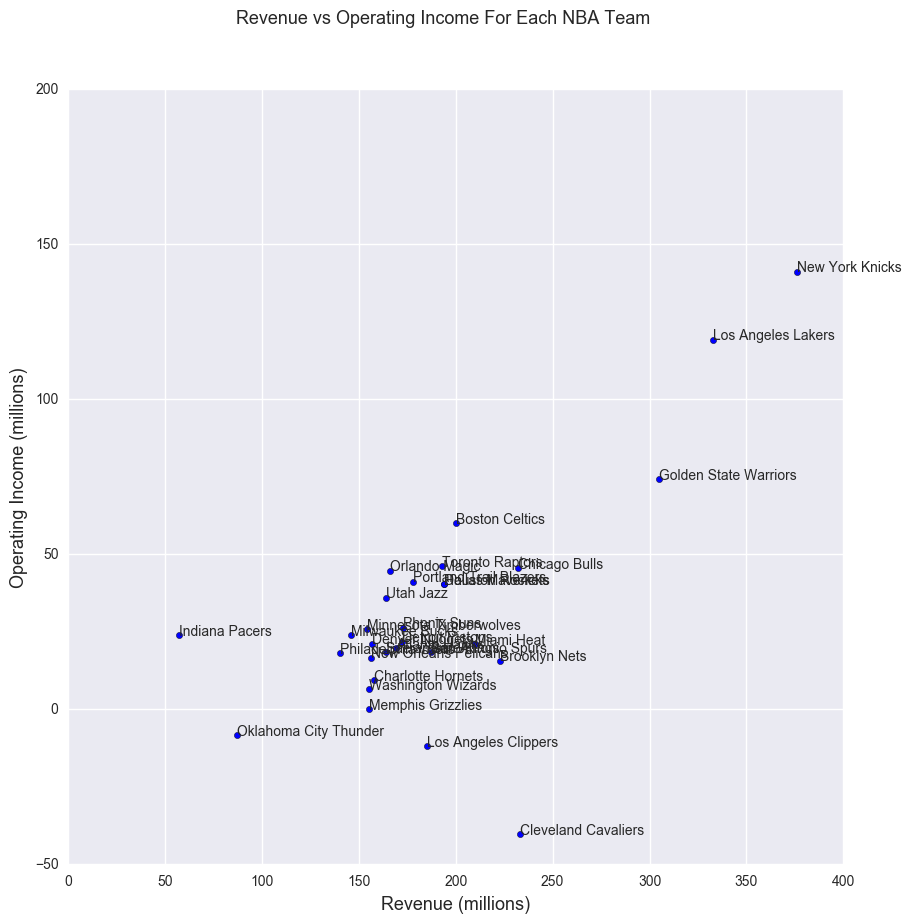

In [22]:
# revenue -> gross sales minus the cost of sales, including cost of goods sold
# operating income -> revenue minus operating expenses

# plot revenue and operating income 
rev = NBA_value_teams.iloc[:,5]
op_income = NBA_value_teams.iloc[:,6]

fig, ax = plt.subplots()
ax.scatter(rev, op_income)
# add the labesl 
plt.xlabel('Revenue (millions)', fontsize = 13)
plt.ylabel('Operating Income (millions)', fontsize = 13)
# add the labels for the food next to the plot on the grpah 
for i, txt in enumerate(NBA_value_teams.iloc[:,1]):
    ax.annotate(txt, (rev[i], op_income[i]))
title_string = "Revenue vs Operating Income For Each NBA Team"
plt.suptitle(title_string, fontsize = 13)
# make the plot bigger to see the individual labels on the points 
plt.rcParams['figure.figsize'] = (10,10)

Three teams, the Oklahoma City Thunder, Los Angeles Clippers, and Cleveland Cavaliers, were operating at a lost for the 2015-2016 season. It is surprising that the Cleveland Cavaliers were operating at a lost given they won the NBA championship last year. The New York Knicks, by far, had the highest revenue to operating income. 

<h3> Specific Players Comparison </h3>

We are going to compare two players that are similar with one from the NBA, Kevin Garnett, and the other from the WNBA, Tamika Catchings.


Kevin Garnett's career honors
    - 21 season in NBA
    - 2008 NBA champion
    - 2004 MVP
    - 15x All Star
    - 4x All-NBA First Team
    - 2008 NBA Defensive Player of the Year 
    - 9x NBA All-Defensive First Team
    - 2000 Olympic Gold Medal 
    - career stats: points(26,071; 17.8ppg), rebounds(14,662; 10.0rpg),
                             assists(5,445; 3.7apg), 

Tamika Catching's career honors 
    - 14 season in WNBA
    - 2012 WNBA champion
    - 2012 WNBA Finals MVP
    - 2011 WNBA MVP 
    - 5x WNBA Defensive Player of the Year
    - 10x WNBA All-Star
    - 7x All-WNBA First Team 
    - 10x WNBA All-Defensive First Team
    - 2004, 2008, 2012, 2016 Olympic Gold Medal 
    - career stats: points(16.1ppg), rebounds(7.3rpg), assist(3.3apg)

Tamika Catching's salary 
    - $1055000
    - net worth: $300 thousand 

Kevin Garnett's salary 
    -\$1,622,000, \$1,666,000, \$2,109,120, \$8,536,585, \$16,806,300, \$19,610,000, \$22,400,000, \$25,200,000
     \$28,000,000, \$16,000,000, \$18,000,000 \$21,000,000, \$23,751,934, \$24,751,934, \$16,417,044, \$18,832,044
     \$17,101,279, \$11, 566,265, \$12,433,735, \$12,000,000, \$8,500,000, \$8,000,000 
    - total: $334,304,240

In [27]:
# career statistics by KG and TC
stats = {"Stats Per Game" : pd.Series([17.8, 10.0, 3.7, 16.1, 7.3, 3.3],
                                     index = ["0", "1", "2", "3", "4", "5"]),
        "Category": pd.Series(["Points", "Rebounds", "Assists",
                              "Points", "Rebounds", "Assists"],
                             index = ["0", "1", "2", "3", "4", "5"]),
         "Player": pd.Series(["Kevin Garnett", "Kevin Garnett", "Kevin Garnett",
                              "Tamika Catchings", "Tamika Catchings", "Tamika Catchings"],
                            index = ["0", "1", "2", "3", "4", "5"])}
stats = pd.DataFrame(stats)
stats

,Category,Player,Stats Per Game
0,Points,Kevin Garnett,17.8
1,Rebounds,Kevin Garnett,10.0
2,Assists,Kevin Garnett,3.7
3,Points,Tamika Catchings,16.1
4,Rebounds,Tamika Catchings,7.3
5,Assists,Tamika Catchings,3.3


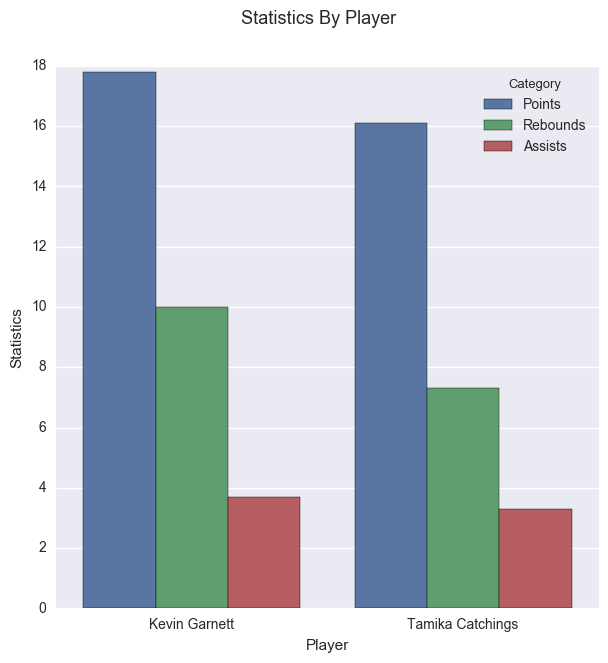

In [28]:
ax = sns.barplot(x = "Player", y = "Stats Per Game", hue = "Category", data = stats)
ax.set(xlabel = 'Player', ylabel = 'Statistics')
title_string = "Statistics By Player"
plt.suptitle(title_string, fontsize = 13)

Base on common statistics kept in basketball games, points, rebounds, and assists, Garnett and Catchings have very similar statistics. Because of this, we think that the palyers are very comparable. 

In [19]:
KG_salary = {"Year": pd.Series(["95-96", "96-97", "97-98", "98-99", "99-00",
                               "00-01", "01-02", "02-03", "03-04", "04-05", 
                                "05-06", "06-07", "07-08", "08-09", "09-10", 
                                "10-11", "11-12", "12-13", "13-14", "14-15", "15-16", "16-17"],
                              index = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11",
                                      "12", "13", "14", "15", "16", "17", "18", "19", "20", "21"]),
            "Salary": pd.Series([1622000, 1666000, 2109120, 8536585, 16806300, 19610000,
                                22400000, 25200000, 28000000, 16000000, 18000000, 21000000,
                                23751934, 24751934, 16417044, 18832044, 17101279, 11566265,
                                12433735, 12000000, 8500000, 8000000],
                               index = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11",
                                      "12", "13", "14", "15", "16", "17", "18", "19", "20", "21"])}
KG_salary = pd.DataFrame(KG_salary)
KG_salary.head()

,Salary,Year
0,1622000,95-96
1,1666000,96-97
2,2109120,97-98
3,8536585,98-99
4,16806300,99-00


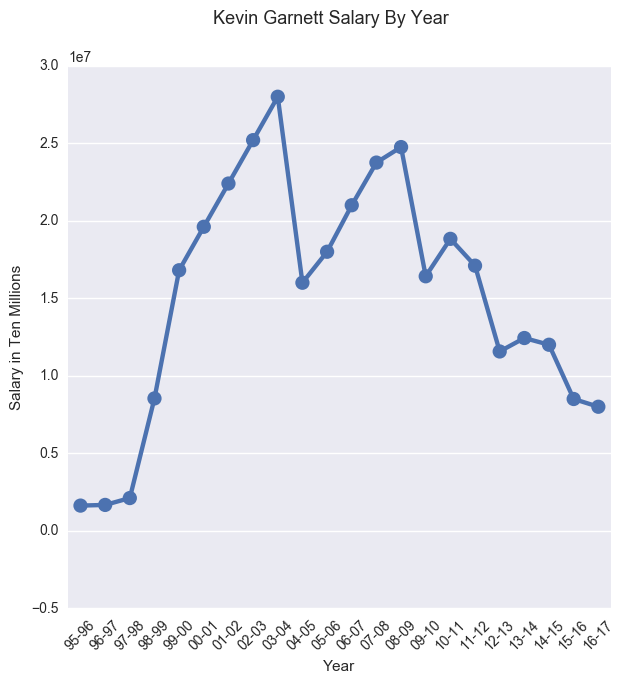

In [26]:
ax = sns.pointplot(x = "Year", y = "Salary", data = KG_salary)
plt.xticks(rotation = 45)
ax.set(xlabel = 'Year', ylabel = 'Salary in Ten Millions')
title_string = "Kevin Garnett Salary By Year"
plt.suptitle(title_string, fontsize = 13)
plt.rcParams['figure.figsize'] = (7,7)
# y axis is in 10 million(!)

There was no data on Tamika Catching's salary by year. This happened a lot when we were collecting data on WNBA players. Many media outlets do not care as much about the WNBA compared to the NBA which made data collection pretty hard. It also speaks to the point that men get more attention from news outlet than women which may contribute to the gender wage gap. 

In [29]:
# KG and TC total salary
total_salary = {"Salary": pd.Series([33, 1],
                                   index = ["0", "1"]),
               "Player": pd.Series(["Kevin Garnett", "Tamika Catchings"],
                                  index = ["0", "1"])}
total_salary = pd.DataFrame(total_salary)
total_salary

,Player,Salary
0,Kevin Garnett,33
1,Tamika Catchings,1


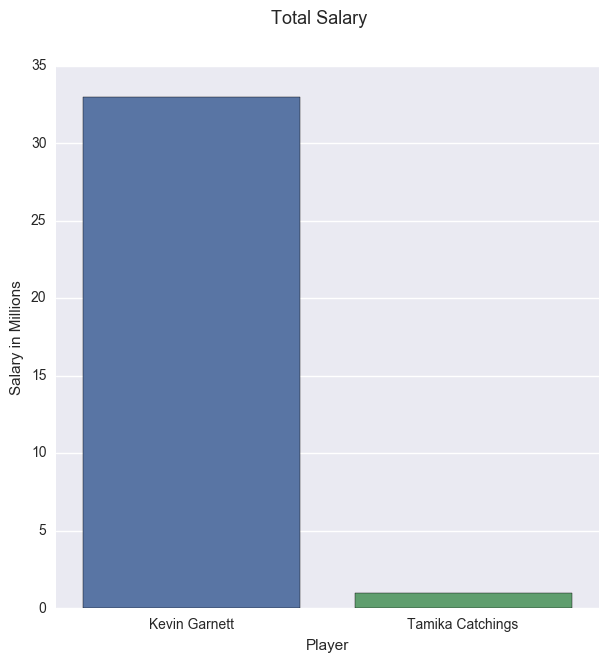

In [30]:
# look at difference between the total salaries of KG and TC
ax = sns.barplot(x = "Player", y = "Salary", data = total_salary)
ax.set(xlabel = 'Player', ylabel = 'Salary in Millions')
title_string = "Total Salary"
plt.suptitle(title_string, fontsize = 13)
# y is in millions 

Over their respective careers, Garnett made over \$32 million compared to Catchin's \$2 million. This is a vast difference between the two players that have very similar resumes, but play for a men and women league respectively. 

In [31]:
bonus = {"League": pd.Series(["NBA", "NBA", "NBA", "NBA", "WNBA", "WNBA", "WNBA", "WNBA"],
                            index = ["0", "1", "2", "3", "4", "5", "6", "7"]),
        "Round": pd.Series(["Champion", "Runner-Up", "Semi-Finals", "Quarter-Finals", "Champion", "Runner-Up", "Semi-Finals", "Quarter-Finals"],
                          index = ["0", "1", "2", "3", "4", "5", "6", "7"]),
        "Bonus": pd.Series([4851365, 3214636, 486463, 408839, 10500, 5250, 2625, 1050],
                          index = ["0", "1", "2", "3", "4", "5", "6", "7"])}
bonus = pd.DataFrame(bonus)
bonus

,Bonus,League,Round
0,4851365,NBA,Champion
1,3214636,NBA,Runner-Up
2,486463,NBA,Semi-Finals
3,408839,NBA,Quarter-Finals
4,10500,WNBA,Champion
5,5250,WNBA,Runner-Up
6,2625,WNBA,Semi-Finals
7,1050,WNBA,Quarter-Finals


In [32]:
# get the ln of bonus 
bonus.iloc[:,0] = np.log(bonus.iloc[:,0])
bonus

,Bonus,League,Round
0,15.394771,NBA,Champion
1,14.983225,NBA,Runner-Up
2,13.094916,NBA,Semi-Finals
3,12.921077,NBA,Quarter-Finals
4,9.259131,WNBA,Champion
5,8.565983,WNBA,Runner-Up
6,7.872836,WNBA,Semi-Finals
7,6.956545,WNBA,Quarter-Finals


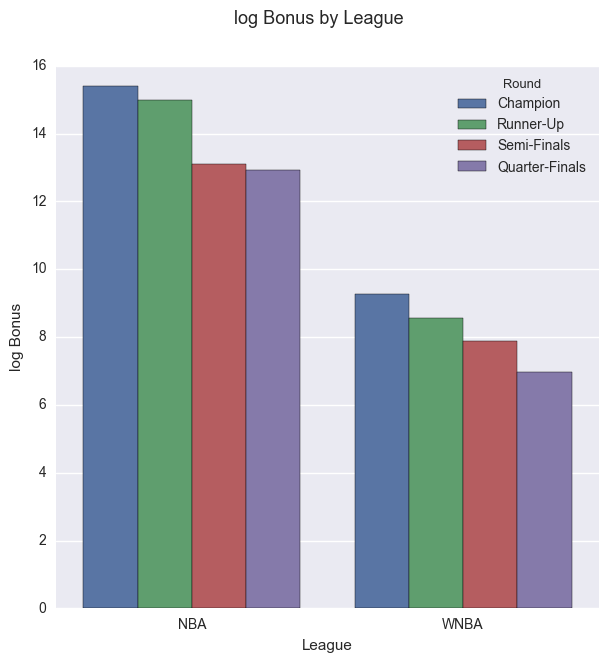

In [33]:
ax = sns.barplot(x = "League", y = "Bonus", hue = "Round", data = bonus)
ax.set(xlabel = 'League', ylabel = 'log Bonus')
title_string = "log Bonus by League"
plt.suptitle(title_string, fontsize = 13)

At all levels of the playoffs, women make far less than men. 

<h3> NBA and WNBA Salary </h3>

We are now going to explore the NBA and WNBA salary for the 2017 and 2018 season. We wer only able to analyze these two seasons because there was no data on the NBA and WNBA players' salaries that overlapped beyond these two seasons. 

In [34]:
# read in the salary for the NBA and WNBA players combined together 
nba_wnba = pd.read_excel(os.path.join(data_path, files[10]))

In [35]:
# look at the beginning of the data
nba_wnba.head()

,Player,Team,2017 Salary,2018 Salary,All Star,Honors,Olympics Gold Medal,Awards,Finals MVP,Experience,...,Age,Age^2,Gender,Points per game,Rebounds per game,Assists per game,Steals per game,Blocks per game,Number of Games,Minutes in Games
0,Carolyn Swords,New York Liberty,130000,140000.0,0,0,0,0,0,6.0,...,27,729,1,4.2,3.4,0.5,0.3,0.5,34,40
1,Tanisha Wright,New York Liberty,310000,320000.0,0,1,0,0,0,10.0,...,33,1089,1,7.7,2.7,3.1,1.0,0.1,34,40
2,Candice Wiggins,New York Liberty,220000,230000.0,0,1,0,1,0,7.0,...,30,900,1,8.6,2.4,1.9,1.0,0.2,34,40
3,Kiah Stokes,New York Liberty,40000,50000.0,0,1,0,0,0,2.0,...,23,529,1,6.3,6.9,0.8,0.7,1.7,34,40
4,Sugar Rodgers,New York Liberty,70000,80000.0,0,0,0,0,0,4.0,...,27,729,1,7.8,2.4,1.4,0.8,0.3,34,40


In [36]:
# look at the end part of the data
nba_wnba.tail()

,Player,Team,2017 Salary,2018 Salary,All Star,Honors,Olympics Gold Medal,Awards,Finals MVP,Experience,...,Age,Age^2,Gender,Points per game,Rebounds per game,Assists per game,Steals per game,Blocks per game,Number of Games,Minutes in Games
769,Jameel Warney\warneja01,DAL,20000,NaN,0,0,0,0,0,0.0,...,23,529,0,0.0,0.0,0,0.0,0.0,82,48
770,Dahntay Jones\jonesda02,CLE,18255,NaN,0,0,0,0,0,12.0,...,36,1296,0,5.4,1.7,0.8,0.4,0.2,82,48
771,Jordan Farmar\farmajo01,SAC,16595,NaN,0,0,0,0,0,9.0,...,30,900,0,7.7,1.9,2.9,0.8,0.1,82,48
772,Ray McCallum\mccalra01,DET,11949,NaN,0,0,0,0,0,4.0,...,25,625,0,6.0,2.0,2.4,0.5,0.2,82,48
773,P.J. Hairston\hairspj02,HOU,11534,NaN,0,0,0,0,0,2.0,...,24,576,0,6.0,2.4,0.5,0.5,0.2,82,48


In [37]:
# change the asset column to float 
nba_wnba.iloc[:,18] = pd.to_numeric(nba_wnba.iloc[:,18], errors = 'coerce')
#nba_wnba.iloc[:,18]

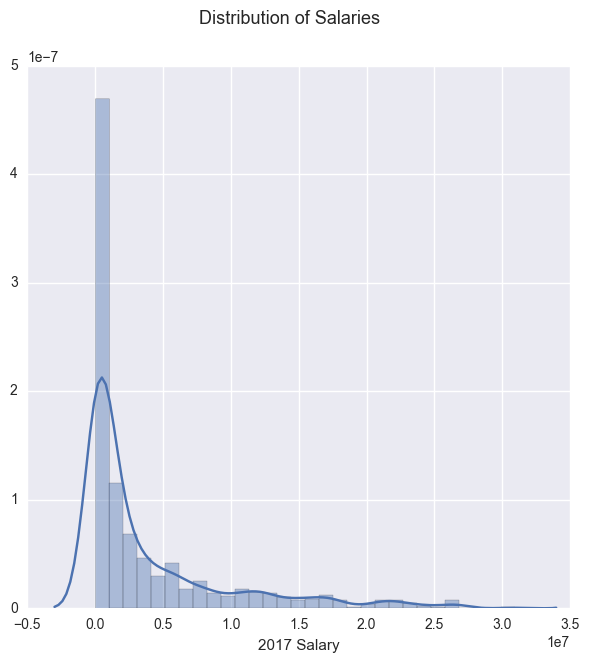

In [38]:
# graph the distribution of 2017 salary
salary_2017 = nba_wnba.iloc[:,2]
sns.distplot(salary_2017)
title_string = "Distribution of Salaries"
plt.suptitle(title_string, fontsize = 13)
# the distribution is heavily right skewed, which is expected of salary

The distribution of NBA and WNBA 2017 salary is really skewed to the right with a bunch of players bunched up from \$0 to \$500,000. Let's explore the NBA and WNBA player salaries separately next. 

In [50]:
# split the dataframe into NBA and WNBA players 
wnba_salary = nba_wnba.iloc[0:189, :]

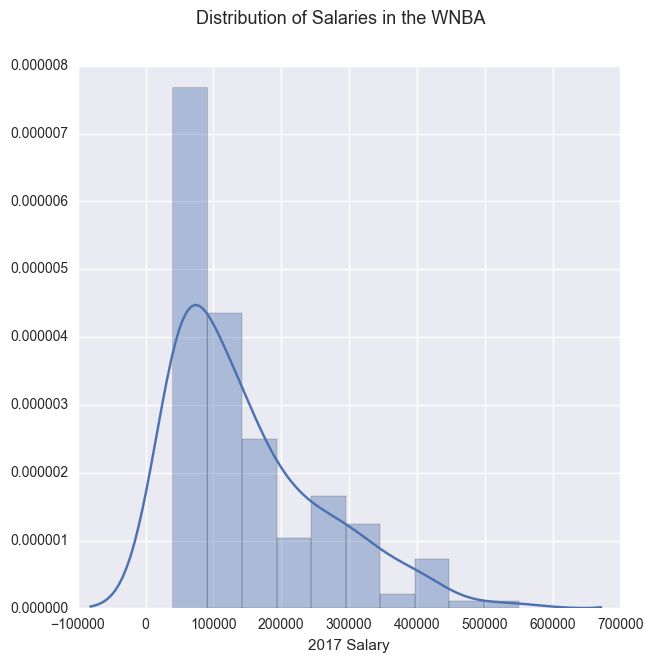

In [51]:
# explore 2017 salaries for NBA and WNBA

# graph the distribution of salaries for WNBA
wnba_2017 = wnba_salary.iloc[:,2]
sns.distplot(wnba_2017)
title_string = "Distribution of Salaries in the WNBA"
plt.suptitle(title_string, fontsize = 13)

The distribution of WNBA player's salaries are skewed to the right also, but not as skewed as the histogram of NBA and WNBA player's distribution. A lot of players' salaries are from \$0 - \$100,000. A few players make more than \$500,000.

In [52]:
# get the NBA salary data 
nba_salary = nba_wnba.iloc[189:774,:]

[(30000, 10000000000)]

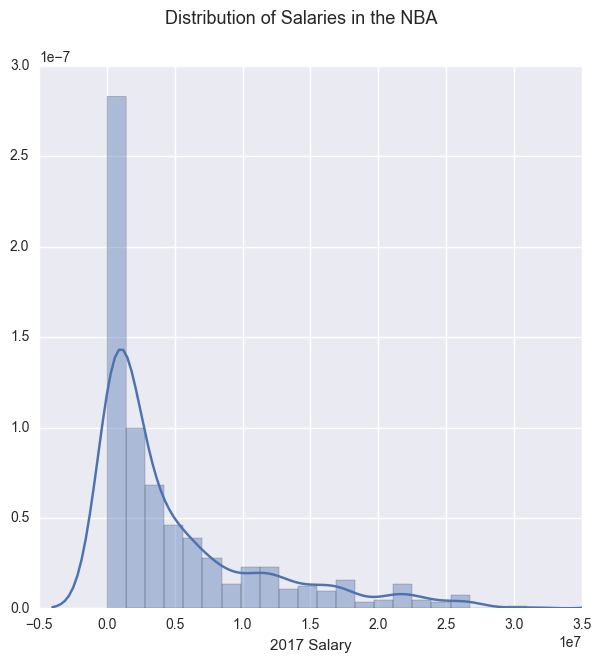

In [53]:
# distribution of salaries in the NBA for the 2015-2016 season
nba_2017 = nba_salary.iloc[:,2]
sns.distplot(nba_2017)
title_string = "Distribution of Salaries in the NBA"
plt.suptitle(title_string, fontsize = 13)
ax.set(xlim = (30000, 10000000000))

The distribution on 2017 NBA players' salaries are more skewed to the right than WNBA players' salaries. There are a lot more players that make more than \$500,000 compared to WNBA players. 

I took the natural log of 2017 and 2018 salaries NBA and WNBA players because it scales it better for us to comapre the salaries. It also makes the data more normal and correts the fact that our distribution is heavily skewed to the right. Additionally, it makes more sense to measure percent change in salaries than the absolute value because of the skewed data.  

In [54]:
# take the natural log of 2017 and 2018 salaries
nba_wnba.iloc[:,2] = np.log(nba_wnba.iloc[:,2])
nba_wnba.iloc[:,3] = np.log(nba_wnba.iloc[:,3])
nba_wnba.head()

,Player,Team,2017 Salary,2018 Salary,All Star,Honors,Olympics Gold Medal,Awards,Finals MVP,Experience,...,Age,Age^2,Gender,Points per game,Rebounds per game,Assists per game,Steals per game,Blocks per game,Number of Games,Minutes in Games
0,Carolyn Swords,New York Liberty,11.775290,11.849398,0,0,0,0,0,6.0,...,27,729,1,4.2,3.4,0.5,0.3,0.5,34,40
1,Tanisha Wright,New York Liberty,12.644328,12.676076,0,1,0,0,0,10.0,...,33,1089,1,7.7,2.7,3.1,1.0,0.1,34,40
2,Candice Wiggins,New York Liberty,12.301383,12.345835,0,1,0,1,0,7.0,...,30,900,1,8.6,2.4,1.9,1.0,0.2,34,40
3,Kiah Stokes,New York Liberty,10.596635,10.819778,0,1,0,0,0,2.0,...,23,529,1,6.3,6.9,0.8,0.7,1.7,34,40
4,Sugar Rodgers,New York Liberty,11.156251,11.289782,0,0,0,0,0,4.0,...,27,729,1,7.8,2.4,1.4,0.8,0.3,34,40


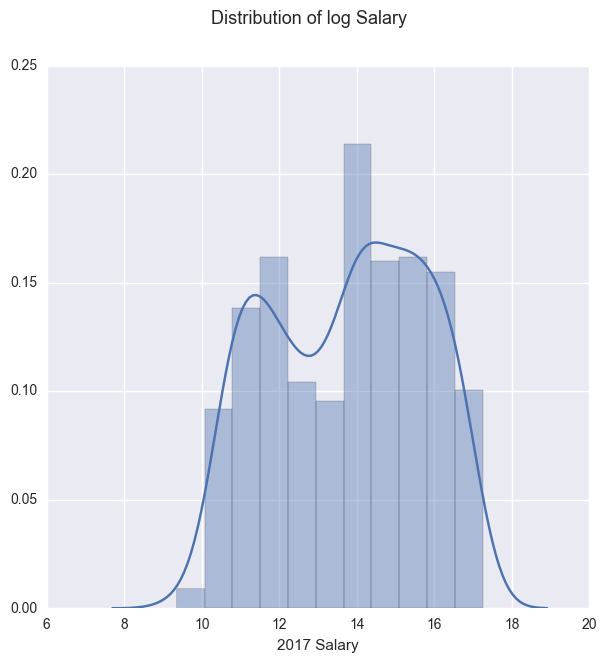

In [55]:
# graph the distribution of the natural log of 2016 salary
ln_salary_2017 = nba_wnba.iloc[:,2]
sns.distplot(ln_salary_2017)
title_string = "Distribution of log Salary"
plt.suptitle(title_string, fontsize = 13)
# the distrbution looks better 

The distribution of all the salaries look a lot more normal after applying the natural log to the salary. It makes our analysis better in the next part when we run regression models to the data. 

In [56]:
# get the ln of WNBA salaries 
wnba_lnsalary = nba_wnba.iloc[0:189, :]

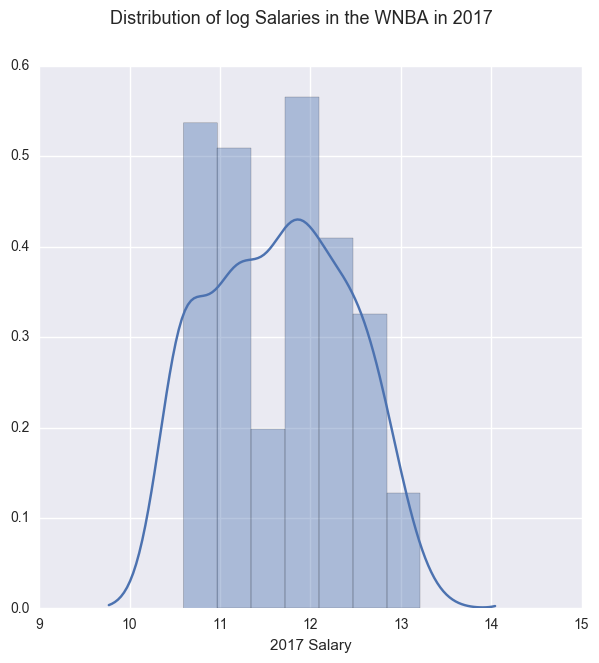

In [61]:
# graph the ln of the distribution of salaries for WNBA
wnba_ln_2017 = np.log(wnba_salary.iloc[:,2])
sns.distplot(wnba_ln_2017)
title_string = "Distribution of log Salaries in the WNBA in 2017"
plt.suptitle(title_string, fontsize = 13)

In [62]:
# get the ln of NBA salaries
nba_lnsalary = nba_wnba.iloc[189:774,:]

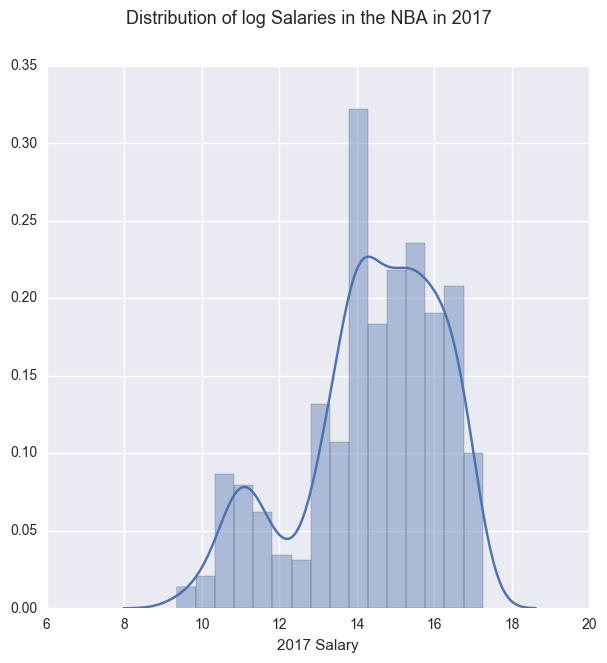

In [65]:
# distribution of ln of salaries in the NBA for 2015-2016 season 
nba_ln_2017 = np.log(nba_salary.iloc[:,2])
sns.distplot(nba_ln_2017)
title_string = "Distribution of log Salaries in the NBA in 2017"
plt.suptitle(title_string, fontsize = 13)

The distribution of the natural log of WNBA players' salaries is more normal than the distribution of the natural log of NBA players' salaries in 2017. Ther is still a lot of players in the NBA that have higher salaries than the highest point on the WNBA player's distribution. 

<h3> Is it Unequal? </h3>

<h5> Two-Sample T-Test </h5>

Next, we are going to investigate whether there is a statistically significant difference between the 2017 WNBA salary and the 2017 NBA salary using a 2-sample t-test. 

$H_0$: There is no difference in the log mean salary of NBA and WNBA players during the 2017 season.

$H_1$: There is a difference in the log mean salary of NBA and WNBA players during the 2017 season.

In [66]:
# get the mean of the salary for all three seasons
wnba_mean_17 = wnba_lnsalary.iloc[:, 2].mean()
print wnba_mean_17

11.653056382


In [67]:
# get the mean of the salary for all three seasons
nba_mean_17 = nba_lnsalary.iloc[:, 2].mean()
print nba_mean_17

14.4062406604


In [68]:
# perform the t-test for the means of the two independent samples
from scipy import stats

# 2017
print stats.ttest_ind(wnba_salary.iloc[:,2], nba_salary.iloc[:,2], equal_var = False)
# statistically significant difference between the two means 

Ttest_indResult(statistic=-18.999650958239688, pvalue=4.6823339627781912e-63)


Because the p-value is significanty smaller than 0.05, we have enough evidence to reject the null hypothesis and conclude that there is a difference between the log mean salary of NBA and WNBA players. 

<h5> OLS Regression</h5>

Next we are going to run some OLS regression models on the natural log of salaries with different independent variables to see if it has a significant effect on gender. Below is a table of the different independent variables we might include in the model. 

Dependent Variable            | Independent Variable              
----------------------------- | ----------------------------------------
Natural log of 2017 salaries  | All Star (1 = yes, 0 = no)   
Natural log of 2018 salaries  | Honors (includes All-Team, All-Defensive Team, All-Rookie Team); (1 = yes, 0 = no)
                              | Olympic Gold Medal (1 = yes, 0 = no)
                              | Awards (includes Defensive POY, Most Improved POY, MVP, Rookie of the Year; Sixth Man of the Year); (1 = yes, 0 = no)          
                              | Finals MVP (1 = yes, 0 = no)
                              | Experience (years played in the league)
                              | Experience Squared
                              | Draft Round (0 = undrafted, 1 = first round, 2 = second round, 3 = third round) 
                              | US College ( in years)
                              | Age (in years as of February 18, 2017)
                              | Age Squared
                              | Gender (1 = female, 0 = male)
                              | Points Per Game
                              | Rebounds Per Game
                              | Assists Per Game
                              | Steals Per Game
                              | Blocks Per Game
                              | Games in Season
                              | Minutes in Game

In [70]:
# rename the columns so it will be easy to type for the regressions below 

nba_wnba.columns = ["A", "B", "C", "D", "E", "F", "G","H",
                             "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S","T", "U", "V", "W"]
# C = ln(2017 salary)
# D = ln(2018 salary)
# E = All Star
# F = Honors 
# G = Olympics Gold Medal
# H = Awards
# I = Finals MVP
# J = Experience
# K = Experience^2
# L = Draft Round
# M = Years Played in US College
# N = Age
# O = Age^2
# P = Gender
# Q = Points Per Game 
# R = Rebounds Per Game 
# S = Assists Per Game
# T = Steals Per Game
# U = Blocks Per Game
# V = Games in Season
# W = Minutes in Games

Below are some things we had to keep in mind while running the OLS regression models for different sets of independent variable on either the natural log of 2017 or 2018 salary. 

Things to keep in mind        | What it means         
----------------------------- | ----------------------------------------
Heteroscedasticity            | the variance is not equal and we correct it with autocorrelation using 1 lag    
$R^{2}$ and Adjusted $R^{2}$  | the higher, the better job the independent variables are at explaining the dependent variable 
AIC and BIC                   | the higher, the wrost the model is
Omnibus                       | the smaller the p-value, the more the residuals are not normal         
Durbin-Watson                 | the closer to 2, the less autocorrelation there is 
Jarque-Bera                   | the smaller the p-value, the more the distribution is not normal (however, as we saw earlier with the distributions, are data is not that normal)
Condition Number              | if it is above 30, there is a multicollinearlity issue 

We are going to build four models that consist of different varieties of independent variables. The dependent variable will be either the natural log of 2017 salary or the natural log of 2018 salary. Below are the four models:

Model                                          |Independent Variables         
---------------------------------------------  | ---------------------------------------------------------
Everything (Model 1)                           | includes all the independent variables   
Awards (Model 2)                               | includes All Star, Honors, Olympic Gold, Awards, Finals MVP, and gender
Basketball Statistics (Model 3)                | Points per game, Rebounds per game, Assists per game, Steals per game, Blocks per game, and gender 
Experience and Basketball Statistics (Model 4) | Experience, $Experience^{2}$, Draft Round, Points per game, Rebounds per game, Assists per game, and gender       

In [71]:
import statsmodels.formula.api as sm

# ln(2017 salaries) 

# model 1
result = sm.ols(formula = "C ~ E + F + G + H + I + J + K + L + M + N + O + P + Q + R + S + T + U + V + W",
                data = nba_wnba).fit(cov_type = 'HAC',cov_kwds = {'maxlags':1})
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     6744.
Date:                Fri, 17 Mar 2017   Prob (F-statistic):               0.00
Time:                        18:06:23   Log-Likelihood:                -1105.1
No. Observations:                 736   AIC:                             2246.
Df Residuals:                     718   BIC:                             2329.
Df Model:                          17                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0112      0.001      8.227      0.0

This model is not that helpful for us because of multicollinearity issues so we will explore other combinations of independent variables.

In [72]:
# model 2
result = sm.ols(formula = "C ~  E + F + G + H + I + P ", 
                data = nba_wnba).fit(cov_type = 'HAC',cov_kwds = {'maxlags':1})
print result.summary()
# gender is signficant 

                            OLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     284.9
Date:                Fri, 17 Mar 2017   Prob (F-statistic):          2.26e-191
Time:                        18:06:26   Log-Likelihood:                -1373.4
No. Observations:                 774   AIC:                             2761.
Df Residuals:                     767   BIC:                             2793.
Df Model:                           6                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     14.0583      0.105    134.258      0.0

In [73]:
# model 3
result = sm.ols(formula = "C ~  Q + R + S + T + U + P", 
                data = nba_wnba).fit(cov_type = 'HAC',cov_kwds = {'maxlags':1})
print result.summary()
# gender is still significant 

                            OLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     266.6
Date:                Fri, 17 Mar 2017   Prob (F-statistic):          8.38e-182
Time:                        18:06:30   Log-Likelihood:                -1241.3
No. Observations:                 753   AIC:                             2497.
Df Residuals:                     746   BIC:                             2529.
Df Model:                           6                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.8035      0.135     94.766      0.0

In [74]:
# model 4
result = sm.ols(formula = "C ~  Q + R + S + J + K + L + P ", 
                data = nba_wnba).fit(cov_type = 'HAC',cov_kwds = {'maxlags':1})
print result.summary()
# gender is still significant 

                            OLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     276.8
Date:                Fri, 17 Mar 2017   Prob (F-statistic):          1.77e-200
Time:                        18:06:36   Log-Likelihood:                -1147.0
No. Observations:                 737   AIC:                             2310.
Df Residuals:                     729   BIC:                             2347.
Df Model:                           7                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.0277      0.141     85.077      0.0

For models 2-4, the variable gender is negative and significant at the 1% level of significance. This means that by being a feamle basektball player, you make a lot less than a male counterpart holding everything else constant during the 2017 season. 

In [75]:
# ln(2018 salaries)

# model 1
result = sm.ols(formula = "D ~ E + F + G + H + I + J + K + L + M + N + O + P + Q + R + S + T + U + V + W",
                data = nba_wnba).fit(cov_type = 'HAC',cov_kwds = {'maxlags':1})
print result.summary() 

                            OLS Regression Results                            
Dep. Variable:                      D   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                 1.236e+04
Date:                Fri, 17 Mar 2017   Prob (F-statistic):               0.00
Time:                        18:06:41   Log-Likelihood:                -511.37
No. Observations:                 509   AIC:                             1059.
Df Residuals:                     491   BIC:                             1135.
Df Model:                          17                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0063      0.001      4.867      0.0

Again, this model is not that helpful for us because of multicollinearity issues so we will explore other combinations of independent variables.

In [76]:
# model 2
result = sm.ols(formula = "D ~  E + F + G + H + I + P ", 
                data = nba_wnba).fit(cov_type = 'HAC',cov_kwds = {'maxlags':1})
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                      D   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     440.5
Date:                Fri, 17 Mar 2017   Prob (F-statistic):          2.47e-204
Time:                        18:07:26   Log-Likelihood:                -696.72
No. Observations:                 547   AIC:                             1407.
Df Residuals:                     540   BIC:                             1438.
Df Model:                           6                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     15.0087      0.077    194.246      0.0

In [77]:
# model 3
result = sm.ols(formula = "D ~  Q + R + S + T + U + P", 
                data = nba_wnba).fit(cov_type = 'HAC',cov_kwds = {'maxlags':1})
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                      D   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     424.9
Date:                Fri, 17 Mar 2017   Prob (F-statistic):          1.27e-196
Time:                        18:07:30   Log-Likelihood:                -624.64
No. Observations:                 526   AIC:                             1263.
Df Residuals:                     519   BIC:                             1293.
Df Model:                           6                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     14.1443      0.091    156.185      0.0

In [78]:
# model 4
result = sm.ols(formula = "D ~  Q + R + S + J + K + L + P ", 
                data = nba_wnba).fit(cov_type = 'HAC',cov_kwds = {'maxlags':1})
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                      D   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     474.8
Date:                Fri, 17 Mar 2017   Prob (F-statistic):          8.83e-217
Time:                        18:07:34   Log-Likelihood:                -527.10
No. Observations:                 510   AIC:                             1070.
Df Residuals:                     502   BIC:                             1104.
Df Model:                           7                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     13.6473      0.099    138.008      0.0

We see the same negative and highly significant variable gender in 2018 salaries. We can conclude that there is definitely a gender wage gap in basketball. 

<h5> Match Pair T-Test</h5>

Next, we will perform a match t-test based on points per game in the 2017 season. We are going to match each WNBA player to an NBA player based on points per game. Becasue there are more NBA players than WNBA players, we will match up to the number of WNBA players and drop the rest of the NBA players.

In [79]:
# match t-test 

# don't want the ln of salaries 
nba_wnba = pd.read_excel(os.path.join(data_path, files[10]))

# but still want to change the column names so it is easier
nba_wnba.columns = ["A", "B", "C", "D", "E", "F", "G","H",
                             "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S","T", "U", "V", "W"]

In [80]:
wnba = nba_wnba.iloc[0:189, :]
nba = nba_wnba.iloc[189:774,:]

# sort the NBA and WNBA players by points
wnba_pt = wnba.sort(["Q"], ascending = 0) 
nba_pt = nba.sort(["Q"], ascending = 0)

/Users/unleong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/unleong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [81]:
# look at the wnba point data
wnba_pt.head()

,A,B,C,D,E,F,G,H,I,J,...,N,O,P,Q,R,S,T,U,V,W
170,Elena Delle Donne,Chicago Sky,70000,80000.0,1,1,1,1,0,4.0,...,27,729,1,20.5,6.6,1.6,0.7,1.7,34,40
176,Angel McCoughtry,Atlanta Dream,190000,200000.0,1,1,1,1,0,8.0,...,30,900,1,19.5,5.0,2,2.2,0.7,34,40
136,Lauren Jackson,Seattle Storm,430000,440000.0,1,1,0,1,1,11.0,...,35,1225,1,18.9,7.7,1.4,1.1,1.8,34,40
59,Maya Moore,Minnesota Lynx,130000,140000.0,1,1,1,1,1,6.0,...,27,729,1,18.6,6.1,3.4,1.6,0.7,34,40
8,Tina Charles,New York Liberty,160000,170000.0,1,1,1,1,0,7.0,...,28,784,1,17.8,10.2,2.1,0.8,1.2,34,40


In [82]:
# look at the nba point data
nba_pt.head()

,A,B,C,D,E,F,G,H,I,J,...,N,O,P,Q,R,S,T,U,V,W
195,Kevin Durant\duranke01,GSW,26540100,27734406.0,1,1,1,1,0,10.0,...,28,784,0,27.3,7.1,3.8,1.2,1.1,82,48
189,LeBron James\jamesle01,CLE,30963450,33285709.0,1,1,1,1,1,14.0,...,32,1024,0,27.1,7.2,7,1.7,0.8,82,48
197,Carmelo Anthony\anthoca01,NYK,24559380,26243760.0,1,1,1,0,0,14.0,...,32,1024,0,24.8,6.6,3.1,1.1,0.5,82,48
200,Dwyane Wade\wadedw01,CHI,23200000,23800000.0,1,1,1,0,1,14.0,...,35,1225,0,23.4,4.8,5.7,1.6,0.9,82,48
270,Stephen Curry\curryst01,GSW,12112359,NaN,1,1,0,1,0,8.0,...,28,784,0,22.6,4.3,6.8,1.8,0.2,82,48


In [83]:
# want to know how many nas values are in the points column for WNBA
wnba_points = wnba_pt["Q"]
#wnba_points
wnba_points.isnull().values.sum()
# there are 19 NANs

19

In [84]:
# drop the last 19 rows in the dataframe wnba_pt 
wnba_pt = wnba_pt.iloc[0:-19, ]
wnba_pt.head()

,A,B,C,D,E,F,G,H,I,J,...,N,O,P,Q,R,S,T,U,V,W
170,Elena Delle Donne,Chicago Sky,70000,80000.0,1,1,1,1,0,4.0,...,27,729,1,20.5,6.6,1.6,0.7,1.7,34,40
176,Angel McCoughtry,Atlanta Dream,190000,200000.0,1,1,1,1,0,8.0,...,30,900,1,19.5,5.0,2,2.2,0.7,34,40
136,Lauren Jackson,Seattle Storm,430000,440000.0,1,1,0,1,1,11.0,...,35,1225,1,18.9,7.7,1.4,1.1,1.8,34,40
59,Maya Moore,Minnesota Lynx,130000,140000.0,1,1,1,1,1,6.0,...,27,729,1,18.6,6.1,3.4,1.6,0.7,34,40
8,Tina Charles,New York Liberty,160000,170000.0,1,1,1,1,0,7.0,...,28,784,1,17.8,10.2,2.1,0.8,1.2,34,40


In [85]:
# check the dimensions of the wnba_pt dataframe and grab that number of rows from the nba_pt dataframe
print wnba_pt.shape
# there are only 170 observations

# grab 170 rows from the nba_pt dataframe
nba_pt = nba_pt.iloc[0:170, ]
nba_pt.shape

(170, 23)


(170, 23)

In [86]:
# find the difference in salaries in 2017 for the NBA and WNBA dataframes
diff = []

for i in range(0, 170):
    tmp = nba_pt.iloc[i, 2] - wnba_pt.iloc[i, 3]
    diff.append(tmp)

# make df into a panda dataframe
diff = pd.DataFrame(diff)
diff.head()

,0
0,26460100.0
1,30763450.0
2,24119380.0
3,23060000.0
4,11942359.0


In [87]:
# add the players' names and 2017 salary to the dataframe
wnba_name = wnba_pt["A"]
nba_name = nba_pt["A"]
wnba_wage = wnba_pt["C"]
nba_wage = nba_pt["C"]

# create a new dataframe to store all the columns
match = []
match_df = pd.DataFrame(match)

match_df["NBA Player"] = nba_name.values
match_df["WNBA Player"] = wnba_name.values
match_df["NBA 2017 Salary"] = nba_wage.values
match_df["WNBA 2017 Salary"] = wnba_wage.values
match_df["Difference"] = diff.values
match_df.head()

,NBA Player,WNBA Player,NBA 2017 Salary,WNBA 2017 Salary,Difference
0,Kevin Durant\duranke01,Elena Delle Donne,26540100,70000,26460100.0
1,LeBron James\jamesle01,Angel McCoughtry,30963450,190000,30763450.0
2,Carmelo Anthony\anthoca01,Lauren Jackson,24559380,430000,24119380.0
3,Dwyane Wade\wadedw01,Maya Moore,23200000,130000,23060000.0
4,Stephen Curry\curryst01,Tina Charles,12112359,160000,11942359.0


In [88]:
# sample mean of difference in NBA and WNBA salaries 
sample_mean = match_df[["Difference"]].mean()
print sample_mean
sample_sd = match_df[["Difference"]].std()
print sample_sd

Difference    1.020993e+07
dtype: float64
Difference    7.712215e+06
dtype: float64


$H_0$: no difference in mean between the salaries of NBA and WNBA players

$H_a$: there is a mean improvement of salaries of NBA players 

In our case, the "treatment" is gender.

In [89]:
# match pair t-test 

import math

# one tail t-test

# standard error of sample mean 
# degrees of freedom = 170 - 1 = 169 
se = sample_mean/ math.sqrt(169)

# t-statistics
t = (sample_mean - 0)/ se
print t

Difference    13.0
dtype: float64


Critical value for $t_{0.05}$ with df = 169 is 1.64.
Our t-statistics is greater than the critical value, meaning we reject the $H_0$.
We have enough evidence to reject the null hypothesis and conclude that 
the "treatment" of being male will result in a higher salary. 

In [90]:
# 90% CI 
ll = sample_mean - (se * 1.64)
print ll
ul = sample_mean + (se * 1.64)
print ul

Difference    8.921912e+06
dtype: float64
Difference    1.149796e+07
dtype: float64


We are 90% confident that the mean difference between NBA and WNBA players are with the 
interval (8,921,912, 11,497,960). The interval doesn't include zero either so we can 
conclude at the 10% level that the two means are indeed different. 

We also matched the players on the championship teams from last season from the NBA and WNBA. We also dropped the extra NBA players because there are more NBA players on a roster (15) compared to WNBA players on a roster (12). 

In [91]:
# match pair t-test for last year's championship teams 

# first read in the data from the matched NBA and WNBA players 
# based on ppg from the champion teams in each league respectivity
match = pd.read_excel(os.path.join(data_path, files[1]))
match

,NBA Player,WNBA Player,NBA Salary,WNBA Salary
0,LeBron James,Nneka Ogwumike,30963450,100000
1,Kyrie Irving,Candance Parker,17638063,220000
2,Kevin Love,Kristi Toliver,21165675,190000
3,Dahntay Jones,Jantel Lavender,18255,130000
4,J.R. Smith,Essence Carson,12800000,220000
5,Mo Williams,Alana Beard,2200000,100000
6,Tristan Thompson,Chelsea Gray,15330435,40000
7,Channing Frye,Ana Dabovic,7806971,310000
8,Matt Dellavedova,Sandrine Gruda,9607500,40000


In [92]:
# subtract the difference in the salary and save it into another df to add to the match df
df = []

for i in range(0, 9):
    tmp = match.iloc[i, 2] - match.iloc[i, 3]
    df.append(tmp)

# make df into a panda dataframe
df = pd.DataFrame(df)
df

,0
0,30863450
1,17418063
2,20975675
3,-111745
4,12580000
5,2100000
6,15290435
7,7496971
8,9567500


In [93]:
# add the df to the match df 
match["Difference"] = df.values
match

,NBA Player,WNBA Player,NBA Salary,WNBA Salary,Difference
0,LeBron James,Nneka Ogwumike,30963450,100000,30863450
1,Kyrie Irving,Candance Parker,17638063,220000,17418063
2,Kevin Love,Kristi Toliver,21165675,190000,20975675
3,Dahntay Jones,Jantel Lavender,18255,130000,-111745
4,J.R. Smith,Essence Carson,12800000,220000,12580000
5,Mo Williams,Alana Beard,2200000,100000,2100000
6,Tristan Thompson,Chelsea Gray,15330435,40000,15290435
7,Channing Frye,Ana Dabovic,7806971,310000,7496971
8,Matt Dellavedova,Sandrine Gruda,9607500,40000,9567500


In [94]:
# proceed with a match pair t-test

# calculate the mean and standard deviation for the difference column 
sample_mean = match[["Difference"]].mean()
print sample_mean
sample_sd = match[["Difference"]].std()
print sample_sd

Difference    1.290893e+07
dtype: float64
Difference    9.620126e+06
dtype: float64


$H_0$: no difference in mean between the salaries of NBA and WNBA players

$H_a$: there is a mean improvement of salaries of NBA players 

In our case, the "treatment" is gender.

In [95]:
# sample mean difference = 12908930
# sample standard deviation = 9620126
# one tail t-test

# standard error of sample mean 
se = sample_mean/ math.sqrt(9)

# degrees of freedom = 9 - 1 = 8 

# t-statistics
t = (sample_mean - 0)/ se
print t

Difference    3.0
dtype: float64


Critical value for $t_{0.05}$ with df = 8 is 1.859.

Our t-statistics is greater than the critical value, meaning we reject the $H_0$.

We have enough evidence to reject the null hypothesis and conclude that the "treatment" of being male will result in a higher salary. 

In [96]:
# 90% CI 
ll = sample_mean - (se * 1.859)
print ll
ul = sample_mean + (se * 1.859)
print ul

Difference    4.909695e+06
dtype: float64
Difference    2.090816e+07
dtype: float64


The 90% CI is (4,909,695, 20,908,160).

We are 90% confident that the difference in mean salaries of NBA and WNBA players 
are within the interval of \$4.1 million and \$20.1 million. Because zero is not 
within the interval, we have enough evidence to reject the null hypothesis of no 
difference in mean salary at the 5% level of signficance. 

<h3> How Unequal? </h3>

From the t-test, match t-test, and OLS regression models, we can see that there is a statistically signficiant difference between NBA and WNBA players' salaries. Now, we want to explore how unequal the salaries are between NBA and WNBA players for the two seasons. We will be calcuating the Gini Coefficient to determine the inequality. The Gini Coefficient is used mainly in economics to determine how unequal a soceity is. The closer the Gini Coefficient is to 1, the more unequal a soceity is. Although there is no soceity with prefect equality, there are different classifications of the Gini Coefficient to determine how unequal a soceity is.  

In the table below, it is the classification of the different levels of the Gini Coefficient:

Gini Coefficient      | How Unequal?      
--------------------  | -----------------------
0.20 - 0.32           | Very Low Inequality  
0.33 - 0.40           | Low Inequality
0.41 - 0.45           | Medium Inequality
0.46 - 0.55           | High Inequality
0.56 - 0.71           | Very High Inequality 

Source: Esstentials of Development Economics by J. Edward Taylor and Travis J. Lybbert 

In [98]:
# sort the players by 2017 salary
nba_wnba_17rank = nba_wnba.sort(["C"], ascending = 1) 
nba_wnba_17rank.head()

/Users/unleong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,A,B,C,D,E,F,G,H,I,J,...,N,O,P,Q,R,S,T,U,V,W
773,P.J. Hairston\hairspj02,HOU,11534,NaN,0,0,0,0,0,2.0,...,24,576,0,6.0,2.4,0.5,0.5,0.2,82,48
772,Ray McCallum\mccalra01,DET,11949,NaN,0,0,0,0,0,4.0,...,25,625,0,6.0,2.0,2.4,0.5,0.2,82,48
771,Jordan Farmar\farmajo01,SAC,16595,NaN,0,0,0,0,0,9.0,...,30,900,0,7.7,1.9,2.9,0.8,0.1,82,48
770,Dahntay Jones\jonesda02,CLE,18255,NaN,0,0,0,0,0,12.0,...,36,1296,0,5.4,1.7,0.8,0.4,0.2,82,48
769,Jameel Warney\warneja01,DAL,20000,NaN,0,0,0,0,0,0.0,...,23,529,0,0.0,0.0,0,0.0,0.0,82,48


In [99]:
# create a dataframe of the ranks of the salary of all the players
tmp = nba_wnba_17rank.C.rank(ascending=True)
tmp = pd.DataFrame(tmp)

# add it to the nba and wnba dataframe
nba_wnba_17rank["ranks_2017"] = tmp.values

# get rank/total number of observations
f_pcy = nba_wnba_17rank.ranks_2017/ 774
f_pcy = pd.DataFrame(f_pcy)

# add it to the nba and wnba dataframe
nba_wnba_17rank["f_pcy_2017"] = f_pcy.values
nba_wnba_17rank.head()

,A,B,C,D,E,F,G,H,I,J,...,P,Q,R,S,T,U,V,W,ranks_2017,f_pcy_2017
773,P.J. Hairston\hairspj02,HOU,11534,NaN,0,0,0,0,0,2.0,...,0,6.0,2.4,0.5,0.5,0.2,82,48,1.0,0.001292
772,Ray McCallum\mccalra01,DET,11949,NaN,0,0,0,0,0,4.0,...,0,6.0,2.0,2.4,0.5,0.2,82,48,2.0,0.002584
771,Jordan Farmar\farmajo01,SAC,16595,NaN,0,0,0,0,0,9.0,...,0,7.7,1.9,2.9,0.8,0.1,82,48,3.0,0.003876
770,Dahntay Jones\jonesda02,CLE,18255,NaN,0,0,0,0,0,12.0,...,0,5.4,1.7,0.8,0.4,0.2,82,48,4.0,0.005168
769,Jameel Warney\warneja01,DAL,20000,NaN,0,0,0,0,0,0.0,...,0,0.0,0.0,0,0.0,0.0,82,48,5.0,0.006460


In [100]:
# find the Gini cofficient for 2017 salary 
# the Gini is used to determine how unequal a soceity is, closer to 1, the more unequal it is

# calculate the covariance between 2017 salary and f(pcy)
cov = np.cov(nba_wnba_17rank.C, nba_wnba_17rank.f_pcy_2017)
print cov
# the covariance between 2017 salary and f(pcy) is 1,332,410.04

# calculate the average 2017 salary
avg_2017 = np.mean(nba_wnba_17rank.C)
print avg_2017
# the average 2017 salary is 3843803.9845

# find the Gini
gini = (2*1332410)/avg_2017
print gini

[[  3.36372394e+13   1.33241004e+06]
 [  1.33241004e+06   8.34094132e-02]]
3843803.9845
0.693276767168


The Gini Coefficient for the 2017 season is 0.69, which is classified as very unequal. 

In [101]:
# order the data in terms of 2018 salary 
nba_wnba_18rank = nba_wnba.sort(["D"], ascending = 1)
nba_wnba_18rank.head()

/Users/unleong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,A,B,C,D,E,F,G,H,I,J,...,N,O,P,Q,R,S,T,U,V,W
129,Waltiea Rolle,Seattle Storm,40000,50000.0,0,0,0,0,0,1.0,...,26,676,1,2.7,3.2,0.3,0.3,0.0,34,40
99,Inga Orekhova,Connecticut Sun,40000,50000.0,0,0,0,0,0,2.0,...,27,729,1,0.0,0.3,0,NaN,0.3,34,40
25,Natalie Achonwa,Indiana Fever,40000,50000.0,0,1,0,0,0,2.0,...,24,576,1,5.9,2.8,0.4,0.5,0.3,34,40
97,Alyssa Thomas,Connecticut Sun,40000,50000.0,0,1,0,0,0,3.0,...,24,576,1,10.1,5.5,1.7,1.2,0.2,34,40
95,Stefanie Dolson,Washington Mystics,40000,50000.0,1,0,0,0,0,3.0,...,25,625,1,8.6,4.9,1.3,0.4,1.0,34,40


In [102]:
# want to know how many nas values are in the 2018 salary column 
nba_wnba_18nas = nba_wnba_18rank["D"]

nba_wnba_18nas.isnull().values.sum()
# there are 227 NANs 

227

In [103]:
# drop the last 227 rows becasue they contain NANs
nba_wnba_18rank = nba_wnba_18rank.iloc[0:-227, ]
nba_wnba_18rank.shape

(547, 23)

In [104]:
# create a dataframe of the ranks of the 2018 salary of all the players
tmp = nba_wnba_18rank.D.rank(ascending=True)
tmp = pd.DataFrame(tmp)

# add it to the nba and wnba dataframe
nba_wnba_18rank["ranks_2018"] = tmp.values

# get rank/total number of observations
f_pcy = nba_wnba_18rank.ranks_2018/ 547
f_pcy = pd.DataFrame(f_pcy)

# add it to the nba and wnba dataframe
nba_wnba_18rank["f_pcy_2018"] = f_pcy.values
nba_wnba_18rank.head()

,A,B,C,D,E,F,G,H,I,J,...,P,Q,R,S,T,U,V,W,ranks_2018,f_pcy_2018
129,Waltiea Rolle,Seattle Storm,40000,50000.0,0,0,0,0,0,1.0,...,1,2.7,3.2,0.3,0.3,0.0,34,40,19.5,0.035649
99,Inga Orekhova,Connecticut Sun,40000,50000.0,0,0,0,0,0,2.0,...,1,0.0,0.3,0,NaN,0.3,34,40,19.5,0.035649
25,Natalie Achonwa,Indiana Fever,40000,50000.0,0,1,0,0,0,2.0,...,1,5.9,2.8,0.4,0.5,0.3,34,40,19.5,0.035649
97,Alyssa Thomas,Connecticut Sun,40000,50000.0,0,1,0,0,0,3.0,...,1,10.1,5.5,1.7,1.2,0.2,34,40,19.5,0.035649
95,Stefanie Dolson,Washington Mystics,40000,50000.0,1,0,0,0,0,3.0,...,1,8.6,4.9,1.3,0.4,1.0,34,40,19.5,0.035649


In [105]:
# find the Gini cofficient for 2018 salary 
# the Gini is used to determine how unequal a soceity is, closer to 1, the more unequal it is

# calculate the covariance between 2018 salary and f(pcy)
cov = np.cov(nba_wnba_18rank.D, nba_wnba_18rank.f_pcy_2018)
print cov
# the covariance between 2018 salary and f(pcy) is 1,677,645.86

# calculate the average 2018 salary
avg_2018 = np.mean(nba_wnba_18rank.D)
print avg_2018
# the average 2017 salary is 4977484.38

# find the Gini
gini = (2*1677645)/avg_2018
print gini

[[  4.85760531e+13   1.67764586e+06]
 [  1.67764586e+06   8.34063678e-02]]
4977484.38391
0.674093526209


The Gini for the 2018 season is 0.67, which would still be classified as very unequal. 

Both Gini coefficient tells me that 2017 and 2018 salaries between the NBA and WNBA are highly unequal. Countries that have similar levels of the Gini coefficient are South Africa, Haiti, and Comoros. These countries are typically developing countries and it is a bit surprising to find our Gini to be very similar to these countries. 

<h3> Differences and Inequality in Other Sports? </h3>

We are going to explore whether other sports have the same kind of difference and inequality between gender as in basketball. We are going to calculate 2-sample t-test statistics and the Gini for men and women tennis players for the top 20 players in terms of career earnings because that was the only data we could find. 

In [112]:
men_tennis = pd.read_excel(os.path.join(data_path, files[2]))
men_tennis.head()

,Player,Money
0,Novak Djokovic,108.8
1,Roger Federer,97.8
2,Rafeal Nadal,78.7
3,Andy Murray,58.8
4,Tete Samras,43.2


In [113]:
women_tennis = pd.read_excel(os.path.join(data_path, files[16]))
women_tennis.head()

,Player,Money
0,Serena Williams,81.7
1,Maria Sharapova,36.4
2,Venus Williams,34.4
3,Victoria Azarenka,28.2
4,Agnieszka Radwariska,26.0


In [114]:
# calculate the match pair test for the men and women tennis players

# first combine the men and women tennis data frames
tennis = []
tennis = pd.DataFrame(tennis)
tennis["Men"] = men_tennis.iloc[:,0]
tennis["Women"] = women_tennis.iloc[:,0]
tennis["Men_Money"] = men_tennis.iloc[:,1]
tennis["Women_Money"] = women_tennis.iloc[:,1]
tennis.head()

,Men,Women,Men_Money,Women_Money
0,Novak Djokovic,Serena Williams,108.8,81.7
1,Roger Federer,Maria Sharapova,97.8,36.4
2,Rafeal Nadal,Venus Williams,78.7,34.4
3,Andy Murray,Victoria Azarenka,58.8,28.2
4,Tete Samras,Agnieszka Radwariska,43.2,26.0


In [115]:
# calculate the difference between the salaries

diff = []

for i in range(0, 20):
    tmp = tennis.iloc[i, 2] - tennis.iloc[i, 3]
    diff.append(tmp)

# make df into a panda dataframe
diff = pd.DataFrame(diff)
diff.head()

,0
0,27.1
1,61.4
2,44.3
3,30.6
4,17.2


In [116]:
# add the diff to the tennis dataframe
tennis["Difference"] = diff.values
tennis.head()

,Men,Women,Men_Money,Women_Money,Difference
0,Novak Djokovic,Serena Williams,108.8,81.7,27.1
1,Roger Federer,Maria Sharapova,97.8,36.4,61.4
2,Rafeal Nadal,Venus Williams,78.7,34.4,44.3
3,Andy Murray,Victoria Azarenka,58.8,28.2,30.6
4,Tete Samras,Agnieszka Radwariska,43.2,26.0,17.2


In [117]:
# calculate the match t-test

# calculate the mean and standard deviation for the difference column 
sample_mean = tennis[["Difference"]].mean()
print sample_mean
sample_sd = tennis[["Difference"]].std()
print sample_sd

Difference    10.671
dtype: float64
Difference    17.135972
dtype: float64


In [118]:
# sample mean difference = 10.671
# sample standard deviation = 17.13
# one tail t-test

# standard error of sample mean 
se = sample_mean/ math.sqrt(20)

# degrees of freedom = 20 - 1 = 19

# t-statistics
t = (sample_mean - 0)/ se
print t

Difference    4.472136
dtype: float64


$H_0$ : There is no difference between men and women career prize money in tennis.

$H_1$ : There is a difference between men and women career prize money in tennis.

Because our t-test statistics is greater than 1.96 which is the critical value at the 5% level of significance, we have enough evidence to reject the null hypothesis and conclude that there is a statistically significant difference between career prize money between men and women tennis player.

Because we found a statistically significant difference between the career prize money won by the top 20 men and women tennis players, we are going to explore how unequal the distribution of money is by calculating the Gini coefficient. 

In [119]:
# combine the two files together 
frames = [men_tennis, women_tennis]
tennis_salary = pd.concat(frames)
tennis_salary.head()

,Player,Money
0,Novak Djokovic,108.8
1,Roger Federer,97.8
2,Rafeal Nadal,78.7
3,Andy Murray,58.8
4,Tete Samras,43.2


In [120]:
# find the Gini coefficient for tennis players

# order the players based on their career salary
tennis_ordered = tennis_salary.sort("Money", ascending = 0) 
tennis_ordered.head()

/Users/unleong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Player,Money
0,Novak Djokovic,108.8
1,Roger Federer,97.8
0,Serena Williams,81.7
2,Rafeal Nadal,78.7
3,Andy Murray,58.8


In [121]:
# create a dataframe of the ranks of the career prize money of the players
rank = tennis_ordered.Money.rank(ascending = True)
rank = pd.DataFrame(rank)

# add it to the tennis player dataframe
tennis_salary["Ranks"] = rank.values

# get rank/total number of observations (there are 40 observations)
f_pcy = tennis_salary.Ranks/ 40
f_pcy = pd.DataFrame(f_pcy)

# add it to the nba and wnba dataframe
tennis_salary["f_pcy"] = f_pcy.values
tennis_salary.head()

,Player,Money,Ranks,f_pcy
0,Novak Djokovic,108.8,40.0,1.000
1,Roger Federer,97.8,39.0,0.975
2,Rafeal Nadal,78.7,38.0,0.950
3,Andy Murray,58.8,37.0,0.925
4,Tete Samras,43.2,36.0,0.900


In [122]:
# calculate the Gini 

# calculate the covariance between career money and f(pcy)
cov = np.cov(tennis_salary.Money, tennis_salary.f_pcy)
print cov
# the covariance between career money and f(pcy) is 3.66

# calculate the average salary
avg = np.mean(tennis_salary.Money)
print avg
# the average career money is 108,552.06

# find the Gini
gini = (2*3.66)/avg
print gini

[[  5.01230318e+02   3.66380128e+00]
 [  3.66380128e+00   8.54086538e-02]]
30.9095
0.236820395024


The Gini coefficient for tennis players are an astonishing 0.24 That is even lower than Switzerland, who has the lowest Gini coefficient in the world at 0.298 in 2011 after taxes and transfers, according to the Pew Research Center. However, the data above only includes the top 20 highest paid athletes in tennis, so it isn't a good comparison to the basektball Gini calculated above. Therfore, we will also calculate the Gini for the top 20 highest paid men and women in the NBA and WNBA. 

In [123]:
# get the top 20 paid women player in 2017

# order by the 2017 salary first
wnba_17_ordered  = wnba.sort("C", ascending = 0) 
wnba_17_top = wnba_17_ordered.iloc[0:20, :]
wnba_17_top.head()

/Users/unleong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,A,B,C,D,E,F,G,H,I,J,...,N,O,P,Q,R,S,T,U,V,W
185,Celine Dumerc,Atlanta Dream,550000,560000.0,0,0,0,0,0,NaN,...,34,1156,1,3.3,2.0,4,1.1,0.1,34,40
175,DeLisha Milton-Jones,Atlanta Dream,490000,500000.0,1,0,1,0,0,16.0,...,42,1764,1,11.2,5.2,1.8,1.2,0.7,34,40
72,Penny Taylor,Phoenix Mercury,430000,440000.0,1,1,0,0,0,15.0,...,35,1225,1,13.0,4.4,3,1.4,0.4,34,40
136,Lauren Jackson,Seattle Storm,430000,440000.0,1,1,0,1,1,11.0,...,35,1225,1,18.9,7.7,1.4,1.1,1.8,34,40
186,Erika de Souza,Atlanta Dream,400000,410000.0,1,1,0,0,0,10.0,...,34,1156,1,9.8,7.1,0.9,0.9,1.2,34,40


In [124]:
# get the top 20 paid men basketball player

# order the 2017 salary first
nba_17_ordered  = nba.sort("C", ascending = 0) 
nba_17_top = nba_17_ordered.iloc[0:20, :]
nba_17_top.head()

/Users/unleong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,A,B,C,D,E,F,G,H,I,J,...,N,O,P,Q,R,S,T,U,V,W
189,LeBron James\jamesle01,CLE,30963450,33285709.0,1,1,1,1,1,14.0,...,32,1024,0,27.1,7.2,7,1.7,0.8,82,48
191,DeMar DeRozan\derozde01,TOR,26540100,27739975.0,1,0,1,0,0,9.0,...,27,729,0,18.9,4.0,2.7,1.0,0.3,82,48
192,James Harden\hardeja01,HOU,26540100,28299339.0,1,1,1,1,0,8.0,...,27,729,0,21.9,4.9,5.5,1.5,0.4,82,48
193,Al Horford\horfoal01,BOS,26540100,27734405.0,1,1,0,0,0,10.0,...,30,900,0,14.4,8.7,2.9,0.8,1.2,82,48
194,Russell Westbrook\westbru01,OKC,26540100,28530608.0,1,1,1,0,0,9.0,...,28,784,0,22.3,6.0,7.8,1.7,0.3,82,48


In [125]:
# combine the two top 20 2017 salaries together 
frames = [nba_17_top, wnba_17_top]
nba_wnba_ordered_17 = pd.concat(frames)
nba_wnba_ordered_17.head()

,A,B,C,D,E,F,G,H,I,J,...,N,O,P,Q,R,S,T,U,V,W
189,LeBron James\jamesle01,CLE,30963450,33285709.0,1,1,1,1,1,14.0,...,32,1024,0,27.1,7.2,7,1.7,0.8,82,48
191,DeMar DeRozan\derozde01,TOR,26540100,27739975.0,1,0,1,0,0,9.0,...,27,729,0,18.9,4.0,2.7,1.0,0.3,82,48
192,James Harden\hardeja01,HOU,26540100,28299339.0,1,1,1,1,0,8.0,...,27,729,0,21.9,4.9,5.5,1.5,0.4,82,48
193,Al Horford\horfoal01,BOS,26540100,27734405.0,1,1,0,0,0,10.0,...,30,900,0,14.4,8.7,2.9,0.8,1.2,82,48
194,Russell Westbrook\westbru01,OKC,26540100,28530608.0,1,1,1,0,0,9.0,...,28,784,0,22.3,6.0,7.8,1.7,0.3,82,48


In [126]:
# order the data from least to greatest in terms of 2017 salary 

nba_wnba_rank_17 = nba_wnba_ordered_17.sort("C", ascending = 0) 

# create a dataframe of the ranks of the 2017 salary 
rank = nba_wnba_rank_17.C.rank(ascending = True)
rank = pd.DataFrame(rank)

# add it to the tennis player dataframe
nba_wnba_ordered_17["Ranks"] = rank.values

# get rank/total number of observations (there are 40 observations)
f_pcy = nba_wnba_ordered_17.Ranks/ 40
f_pcy = pd.DataFrame(f_pcy)

# add it to the nba and wnba dataframe
nba_wnba_ordered_17["f_pcy"] = f_pcy.values
nba_wnba_ordered_17.head()

/Users/unleong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,A,B,C,D,E,F,G,H,I,J,...,P,Q,R,S,T,U,V,W,Ranks,f_pcy
189,LeBron James\jamesle01,CLE,30963450,33285709.0,1,1,1,1,1,14.0,...,0,27.1,7.2,7,1.7,0.8,82,48,40.0,1.0000
191,DeMar DeRozan\derozde01,TOR,26540100,27739975.0,1,0,1,0,0,9.0,...,0,18.9,4.0,2.7,1.0,0.3,82,48,36.5,0.9125
192,James Harden\hardeja01,HOU,26540100,28299339.0,1,1,1,1,0,8.0,...,0,21.9,4.9,5.5,1.5,0.4,82,48,36.5,0.9125
193,Al Horford\horfoal01,BOS,26540100,27734405.0,1,1,0,0,0,10.0,...,0,14.4,8.7,2.9,0.8,1.2,82,48,36.5,0.9125
194,Russell Westbrook\westbru01,OKC,26540100,28530608.0,1,1,1,0,0,9.0,...,0,22.3,6.0,7.8,1.7,0.3,82,48,36.5,0.9125


In [127]:
# calculate the Gini coefficient 

# calculate the covariance between 2017 salary and f(pcy)
cov = np.cov(nba_wnba_ordered_17.C, nba_wnba_ordered_17.f_pcy)
print cov
# the covariance between 2017 salary and f(pcy) is 3,253,592

# calculate the average 2017 salary
avg = np.mean(nba_wnba_ordered_17.C)
print avg
# the average 2017 salary is 4977484.38

# find the Gini
gini = (2*3253592)/avg
print gini

[[  1.51797626e+14   3.25359245e+06]
 [  3.25359245e+06   8.43669872e-02]]
12434812.95
0.523303730114


The Gini coefficient is 0.523 now, which is lower than the aggregate of the NBA and WNBA salaries in 2017, but it is still a lot higher than tennis players. A Gini coefficient of this level is comparable to Chile and Guatemala which is in the top 15 most unequal countries in the world. 

In [128]:
# find the Gini for 2017 salary in the top 20 NBA and WNBA players 

# order the 2018 salary for WNBA players
wnba_18_ordered = wnba.sort("D", ascending = 0)
wnba_18_top = wnba_18_ordered.iloc[0:20, :]
wnba_18_top.head() 

/Users/unleong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,A,B,C,D,E,F,G,H,I,J,...,N,O,P,Q,R,S,T,U,V,W
185,Celine Dumerc,Atlanta Dream,550000,560000.0,0,0,0,0,0,NaN,...,34,1156,1,3.3,2.0,4,1.1,0.1,34,40
175,DeLisha Milton-Jones,Atlanta Dream,490000,500000.0,1,0,1,0,0,16.0,...,42,1764,1,11.2,5.2,1.8,1.2,0.7,34,40
72,Penny Taylor,Phoenix Mercury,430000,440000.0,1,1,0,0,0,15.0,...,35,1225,1,13.0,4.4,3,1.4,0.4,34,40
136,Lauren Jackson,Seattle Storm,430000,440000.0,1,1,0,1,1,11.0,...,35,1225,1,18.9,7.7,1.4,1.1,1.8,34,40
186,Erika de Souza,Atlanta Dream,400000,410000.0,1,1,0,0,0,10.0,...,34,1156,1,9.8,7.1,0.9,0.9,1.2,34,40


In [129]:
# order the 2018 salary for NBA players
nba_18_ordered  = nba.sort("D", ascending = 0) 
nba_18_top = nba_18_ordered.iloc[0:20, :]
nba_18_top.head()

/Users/unleong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,A,B,C,D,E,F,G,H,I,J,...,N,O,P,Q,R,S,T,U,V,W
189,LeBron James\jamesle01,CLE,30963450,33285709.0,1,1,1,1,1,14.0,...,32,1024,0,27.1,7.2,7,1.7,0.8,82,48
194,Russell Westbrook\westbru01,OKC,26540100,28530608.0,1,1,1,0,0,9.0,...,28,784,0,22.3,6.0,7.8,1.7,0.3,82,48
190,Mike Conley\conlemi01,MEM,26540100,28530608.0,0,1,0,0,0,10.0,...,29,841,0,13.9,2.9,5.7,1.5,0.2,82,48
192,James Harden\hardeja01,HOU,26540100,28299339.0,1,1,1,1,0,8.0,...,27,729,0,21.9,4.9,5.5,1.5,0.4,82,48
191,DeMar DeRozan\derozde01,TOR,26540100,27739975.0,1,0,1,0,0,9.0,...,27,729,0,18.9,4.0,2.7,1.0,0.3,82,48


In [130]:
# combine the top 20 players from the NBA and WNBA in terms of 2018 salary 
frames = [nba_18_top, wnba_18_top]
nba_wnba_ordered_18 = pd.concat(frames)
nba_wnba_ordered_18.head()

,A,B,C,D,E,F,G,H,I,J,...,N,O,P,Q,R,S,T,U,V,W
189,LeBron James\jamesle01,CLE,30963450,33285709.0,1,1,1,1,1,14.0,...,32,1024,0,27.1,7.2,7,1.7,0.8,82,48
194,Russell Westbrook\westbru01,OKC,26540100,28530608.0,1,1,1,0,0,9.0,...,28,784,0,22.3,6.0,7.8,1.7,0.3,82,48
190,Mike Conley\conlemi01,MEM,26540100,28530608.0,0,1,0,0,0,10.0,...,29,841,0,13.9,2.9,5.7,1.5,0.2,82,48
192,James Harden\hardeja01,HOU,26540100,28299339.0,1,1,1,1,0,8.0,...,27,729,0,21.9,4.9,5.5,1.5,0.4,82,48
191,DeMar DeRozan\derozde01,TOR,26540100,27739975.0,1,0,1,0,0,9.0,...,27,729,0,18.9,4.0,2.7,1.0,0.3,82,48


In [131]:
# order the data from least to greatest in terms of 2018 salary 

nba_wnba_rank_18 = nba_wnba_ordered_18.sort("D", ascending = 0) 

# create a dataframe of the ranks of the 2017 salary 
rank = nba_wnba_rank_18.D.rank(ascending = True)
rank = pd.DataFrame(rank)

# add it to the tennis player dataframe
nba_wnba_ordered_18["Ranks"] = rank.values

# get rank/total number of observations (there are 40 observations)
f_pcy = nba_wnba_ordered_18.Ranks/ 40
f_pcy = pd.DataFrame(f_pcy)

# add it to the nba and wnba dataframe
nba_wnba_ordered_18["f_pcy"] = f_pcy.values
nba_wnba_ordered_18.head()

/Users/unleong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,A,B,C,D,E,F,G,H,I,J,...,P,Q,R,S,T,U,V,W,Ranks,f_pcy
189,LeBron James\jamesle01,CLE,30963450,33285709.0,1,1,1,1,1,14.0,...,0,27.1,7.2,7,1.7,0.8,82,48,40.0,1.0000
194,Russell Westbrook\westbru01,OKC,26540100,28530608.0,1,1,1,0,0,9.0,...,0,22.3,6.0,7.8,1.7,0.3,82,48,38.5,0.9625
190,Mike Conley\conlemi01,MEM,26540100,28530608.0,0,1,0,0,0,10.0,...,0,13.9,2.9,5.7,1.5,0.2,82,48,38.5,0.9625
192,James Harden\hardeja01,HOU,26540100,28299339.0,1,1,1,1,0,8.0,...,0,21.9,4.9,5.5,1.5,0.4,82,48,37.0,0.9250
191,DeMar DeRozan\derozde01,TOR,26540100,27739975.0,1,0,1,0,0,9.0,...,0,18.9,4.0,2.7,1.0,0.3,82,48,36.0,0.9000


In [132]:
# calculate the 2018 salary Gini coefficient 

# calculate the covariance between 2018 salary and f(pcy)
cov = np.cov(nba_wnba_ordered_18.D, nba_wnba_ordered_18.f_pcy)
print cov
# the covariance between 2018 salary and f(pcy) is 3,447,215 

# calculate the average 2018 salary
avg = np.mean(nba_wnba_ordered_18.D)
print avg
# the average 2018 salary is 13,152,420

# find the Gini
gini = (2*3447215)/avg
print gini

[[  1.70327437e+14   3.44721512e+06]
 [  3.44721512e+06   8.48397436e-02]]
13152420.45
0.524194769032


The Gini coefficient for the 2018 salary of the top 20 highest paid NBA and WNBA players is about the same as the 2017 salary at 0.524. This means that the Gini is not much different between the different years. I think if we compared total career earnings instead yearly earnings, the Gini coefficient would increase because of what we saw between Garnett and Catchings previously. 

We will now graph the different Gini coefficients that we have calcuated with countries that are comparable with these Ginis. We are going to treat each of the Ginis we calcualted for the different sports as a "country" and see how it compares with real world countries. The Gini coefficients for different countries came from the CIA database. (more information at the link https://www.cia.gov/library/publications/the-world-factbook/rankorder/2172rank.html)

According to the CIA database, the most unequal country in the world is Lesotho with a Gini of 0.63 and the most equal country in the world is Slovenia with a Gini of 0.24. The United States is ranked in the middle with a Gini of 0.45.

In [133]:
# create a dataframe of all the Gini coefficients 

gini = {"Country" : pd.Series(["Basketball_17_All", "Basketball_18_All", "Basketball_17_Top",
                               "Basketball_18_Top", "Tennis_Top", "Lesotho", "South Africa",
                               "Haiti", "Hong Kong", "Guatemala", "Chile", "Brazil", "United STates",
                               "Sweden", "Ukraine", "Slovenia"],
                                     index = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9",
                                             "10", "11", "12", "13", "14", "15"]),
        "Gini": pd.Series([0.69, 0.67, 0.52, 0.52, 0.24, 0.63, 0.63, 0.61, 0.54, 0.53, 
                          0.52, 0.52, 0.45, 0.25, 0.24, 0.24],
                             index = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9",
                                             "10", "11", "12", "13", "14", "15"])}
gini = pd.DataFrame(gini)
gini

,Country,Gini
0,Basketball_17_All,0.69
1,Basketball_18_All,0.67
2,Basketball_17_Top,0.52
3,Basketball_18_Top,0.52
4,Tennis_Top,0.24
5,Lesotho,0.63
6,South Africa,0.63
7,Haiti,0.61
8,Hong Kong,0.54
9,Guatemala,0.53


[(0, 1)]

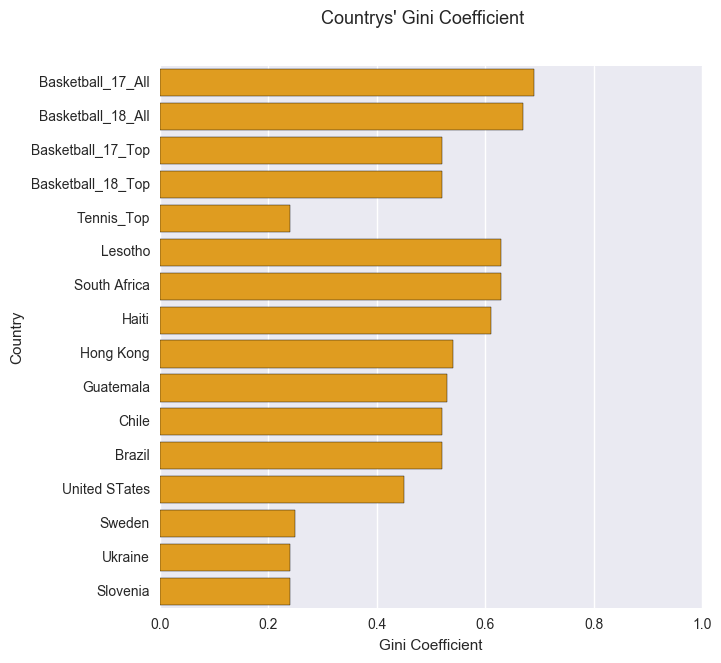

In [134]:
# graph the Gini and label the points 

# plot country and their respective gini coefficients
country = gini.iloc[:,0]
gini_coefficient = gini.iloc[:,1]

ax = sns.barplot(x = 'Gini', y = 'Country',
          data = gini, color = "orange")
ax.set(xlabel = 'Gini Coefficient', ylabel = 'Country')
plt.rcParams['figure.figsize'] = (7,7)
title_string = "Countrys' Gini Coefficient"
plt.suptitle(title_string, fontsize = 13)
ax.set(xlim = (0,1))

As you can see in the graph above, if we treat the 2017 and 2018 NBA and WNBA salaries as a country, it has an even higher Gini then the highest Gini in the world in Lesotho. If you treat the top 20 players in 2017 and 2018 NBA and WNBA salaries, the Gini is comparable to countries that are very unequal but not as bad. However, if we just look at the top tennis players, their Gini is lower than the lowest Gini in the world in Slovenia. Therefore, it tells us that basketball is one of the most unequal sports while tennis is one of the most equal sports in terms of wages between males and females. 

<h3> Conclusion </h3>

Even in the most equal country in the world, income is not equally distributed among the population. The same may be true for athletes in terms of gender. Many people enjoy watching male athletes compete more than female atheltes becasue they find it more entertaining. However, we, as a soceity, should be mindful of how much unequalness between wage rates we are going to tolerate  between male and female athletes. Iceland, for instance, is going to be the first country to official require gender pay equality. Many expect that by 2022, the gender wage gap in Iceland will be close to zero. This is a great step forward to reducing the gender wage gap and other countries should follow Icleand's step. I think as a country that is built on equality, we should be mindful that even in the 21 century, still not everyone is treated equally. 